In [2]:
import os
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
import numpy as np

sns.set_style("white")

ROOT_DIR = os.getcwd()  # .../somalogic
DAT_DIR = os.path.join(ROOT_DIR, 'results', 'datasets')  # .../somalogic/results/datasets
TEST_DIR = os.path.join(DAT_DIR, 'test')  # .../somalogic/results/datasets/test
PLOTS_DIR = os.path.join(ROOT_DIR, 'results', 'plots')


# AUC Curves for A2 Train/Test and A3 Train/Test

In [30]:
# helper function
def get_train_stats(dict):

    mean_fpr = dict['mean_fpr']
    mean_tpr = dict['mean_tpr']
    mean_auc = dict['mean_auc']
    std_auc = dict['std_auc']
    tprs_std_lower = dict['tprs_std_lower']
    tprs_std_upper = dict['tprs_std_upper']
    tprs_ci_lower = dict['tprs_ci_lower']
    tprs_ci_upper = dict['tprs_ci_upper']
    
    ci_auc = 1.96 * (std_auc/math.sqrt(50))

    return mean_fpr, mean_tpr, mean_auc, std_auc, tprs_std_lower, tprs_std_upper, tprs_ci_lower, tprs_ci_upper, ci_auc

def get_test_stats(dict):
    y = dict['y']
    y_pred_proba = dict['y_pred_proba']
    y_pred = dict['y_pred']
    fpr = dict['fpr']
    tpr = dict['tpr']
    
    return y, y_pred_proba, y_pred, fpr, tpr

### Get confusion matrix

In [31]:
def show_cf_matrix(cf_matrix):
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',
                xticklabels=['Controls', 'Cases'],
                yticklabels=['Controls', 'Cases'])
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    # plt.savefig(f'{res_dir}/{data}_{outcome}_{X_choice}_confusion_matrix_log10_lambda={lamb}.png', bbox_inches='tight')
    plt.show()

Infe A2 protein model


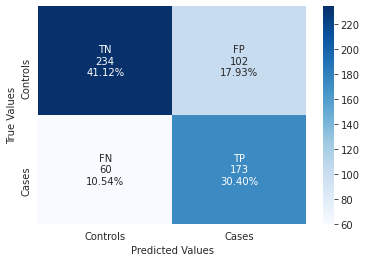

Infe A2 baseline model


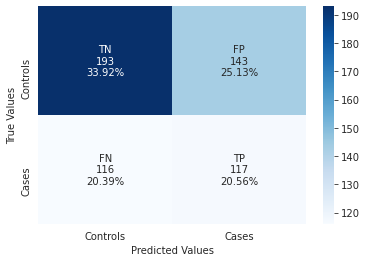

Infe A3 protein model


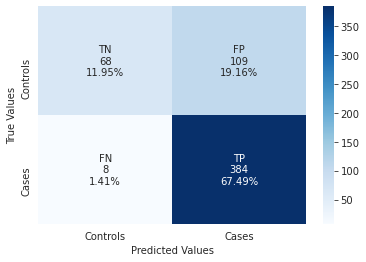

Infe A3 baseline model


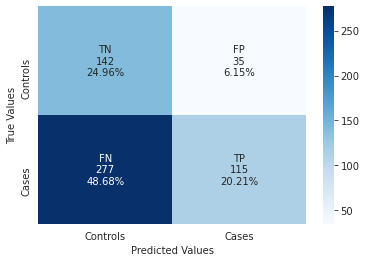

In [32]:
outcomes = ['A2', 'A3']

for outcome in outcomes:
    baseline_file = os.path.join(TEST_DIR, f'infe_{outcome}_baseline_test_results.pkl')
    protein_file =  os.path.join(TEST_DIR, f'infe_{outcome}_all_proteins_test_results.pkl')

    with open(baseline_file, "rb") as fp:  # Unpickling
        baseline_test_dict = pickle.load(fp)

    with open(protein_file, "rb") as fp:  # Unpickling
        protein_test_dict = pickle.load(fp)
    # print(test_dict)


    baseline_y, _, baseline_y_pred, _, _ = get_test_stats(baseline_test_dict)
    protein_y, _, protein_y_pred, _, _ = get_test_stats(protein_test_dict)

    baseline_cf_matrix = confusion_matrix(baseline_y, baseline_y_pred)
    protein_cf_matrix = confusion_matrix(protein_y, protein_y_pred)
    
    print(f'Infe {outcome} protein model')
    show_cf_matrix(protein_cf_matrix)
    
    print(f'Infe {outcome} baseline model')
    show_cf_matrix(baseline_cf_matrix)


### AUC Curves
- Standard deviation was calculated assuming the **population standard deviation** $\sigma$
    - i.e. `pandas.DataFrame.std(ddof=0)` which is consistent with `numpy.std`

To calculate confidence intervals for the population mean $\mu$, we use the sample mean $\bar{x}$ as follows
$$
\mu = \bar{x} \pm z \times \frac{\sigma}{\sqrt{n}}
$$
where, $\sigma$ is the population standard deviation, $n$ is the sample size, and for 95% confidence intervals, $z = 1.96$.
Note that $\frac{\sigma}{\sqrt{n}}$ is the standard error

Here, we calculate 95% CI for the training AUC curves where $n=50$ since each data point is averaged over 50 validation set AUC score. 

The 95% CI says that only 5% of the time, the mean will not lie in the range
$$
\mu = \bar{x} \pm z \times \frac{\sigma}{\sqrt{n}}
$$

A3 protein model
[[ 68 109]
 [  8 384]]
TN: 68 (11.95079086115993%), FP: 109 (19.15641476274165%), FN: 8 (1.40597539543058%), TP: 384 (67.48681898066783%)
Sensitivity = 97.95918367346938%
Specificity = 38.4180790960452%
Positive Predictive Value = 77.89046653144017%
Negative Predictive Value = 89.47368421052632%

A3 baseline model
[[142  35]
 [277 115]]
TN: 142 (24.956063268892795%), FP: 35 (6.151142355008787%), FN: 277 (48.68189806678383%), TP: 115 (20.210896309314588%)
Sensitivity = 29.336734693877553%
Specificity = 80.22598870056497%
Positive Predictive Value = 76.66666666666667%
Negative Predictive Value = 33.89021479713604%

A2 protein model
[[234 102]
 [ 60 173]]
TN: 234 (41.12478031634446%), FP: 102 (17.926186291739896%), FN: 60 (10.54481546572935%), TP: 173 (30.40421792618629%)
Sensitivity = 74.2489270386266%
Specificity = 69.64285714285714%
Positive Predictive Value = 62.90909090909091%
Negative Predictive Value = 79.59183673469387%

A2 baseline model
[[193 143]
 [116 117]]
TN

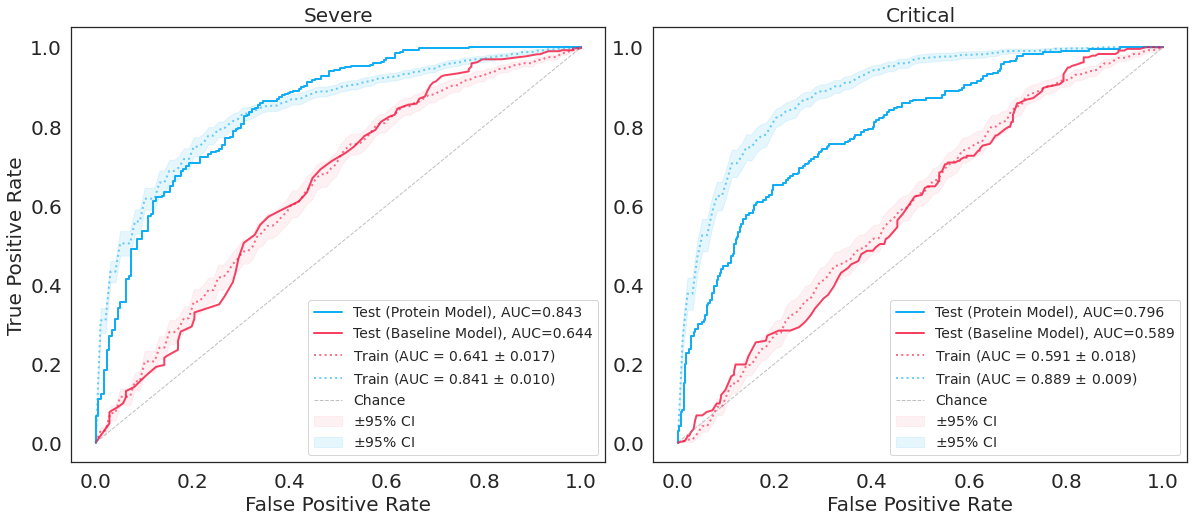

In [60]:
plotting_params = {'axes.labelsize': 20,
                           'legend.fontsize': 14,
                           'xtick.labelsize': 20,
                           'ytick.labelsize': 20,
                           'axes.titlesize': 20}
plt.rcParams.update(plotting_params)
plt.subplots(figsize=(20,8))
data = 'infe'
outcomes = ['A3', 'A2']
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.09, hspace=0.05) # set the spacing between axes. 

for i, outcome in enumerate(outcomes):
    ################################################### TEST ###################################################
    baseline_file = os.path.join(TEST_DIR, f'{data}_{outcome}_baseline_test_results.pkl')
    protein_file =  os.path.join(TEST_DIR, f'{data}_{outcome}_all_proteins_test_results.pkl')
    
    with open(baseline_file, "rb") as fp:  # Unpickling
        baseline_test_dict = pickle.load(fp)
    
    with open(protein_file, "rb") as fp:  # Unpickling
        protein_test_dict = pickle.load(fp)
    # print(test_dict)
    
    
    baseline_y, baseline_y_pred_proba, baseline_y_pred, baseline_fpr, baseline_tpr = get_test_stats(baseline_test_dict)
    protein_y, protein_y_pred_proba, protein_y_pred, protein_fpr, protein_tpr = get_test_stats(protein_test_dict)
    
    baseline_auc = metrics.roc_auc_score(baseline_y, baseline_y_pred_proba)
    protein_auc = metrics.roc_auc_score(protein_y, protein_y_pred_proba)
    
    plt.subplot(gs1[i])

    plt.plot(protein_fpr, protein_tpr, color='#11adf5', lw=2, linestyle='solid',
             label="Test (Protein Model), AUC=" + "{:.3f}".format(protein_auc))  # plot roc curve
    plt.plot(baseline_fpr, baseline_tpr, color='#f5113b', alpha=0.8, lw=2, linestyle='solid',
             label="Test (Baseline Model), AUC=" + "{:.3f}".format(baseline_auc))  # plot roc curve

   
    
    ################################################### TRAIN ###################################################
    baseline_file = os.path.join(ROOT_DIR, 'results', 'models',  f'{data}_{outcome}_baseline_train_results.pkl')
    protein_file = os.path.join(ROOT_DIR, 'results', 'models',  f'{data}_{outcome}_all_proteins_train_results.pkl')

    with open(baseline_file, "rb") as fp:  # Unpickling
        baseline_train_dict = pickle.load(fp)
    
    with open(protein_file, "rb") as fp:  # Unpickling
        protein_train_dict = pickle.load(fp)
    # print(test_dict)
    
    mean_fpr, mean_tpr, mean_auc, std_auc, tprs_std_lower, tprs_std_upper, tprs_ci_lower, tprs_ci_upper, ci_auc = get_train_stats(baseline_train_dict)
    
## standard deviation
#     plt.plot(mean_fpr, mean_tpr, linestyle='dotted', color='#f5113b',
#             label=r'Train (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
#             lw=2, alpha=.6)
#     plt.fill_between(mean_fpr, tprs_std_lower, tprs_std_upper, color='#f5113b', alpha=.055,
#                     label=r'$\pm$ 1 std. dev. = %0.3f' % (std_auc))
    
    plt.plot(mean_fpr, mean_tpr, linestyle='dotted', color='#f5113b',
            label=r'Train (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, ci_auc),
            lw=2, alpha=.6)
#     plt.fill_between(mean_fpr, tprs_ci_lower, tprs_ci_upper, color='#f5113b', alpha=.055,
#                     label=r'$\pm 95 \%% $ CI = %0.3f' % (ci_auc))
    plt.fill_between(mean_fpr, tprs_ci_lower, tprs_ci_upper, color='#f5113b', alpha=.055,
                    label=r'$\pm 95 \%% $ CI')

    mean_fpr, mean_tpr, mean_auc, std_auc, tprs_std_lower, tprs_std_upper, tprs_ci_lower, tprs_ci_upper, ci_auc = get_train_stats(protein_train_dict)
#     plt.plot(mean_fpr, mean_tpr, linestyle='dotted', color='#11adf5',
#             label=r'Train (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
#             lw=2, alpha=.6)
#     plt.fill_between(mean_fpr, tprs_std_lower, tprs_std_upper, color='#11adf5', alpha=.1,
#                     label=r'$\pm$ 1 std. dev. = %0.3f' % (std_auc))
    
    plt.plot(mean_fpr, mean_tpr, linestyle='dotted', color='#11adf5',
            label=r'Train (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, ci_auc),
            lw=2, alpha=.6)
#     plt.fill_between(mean_fpr, tprs_ci_lower, tprs_ci_upper, color='#11adf5', alpha=.1,
#                     label=r'$\pm 95 \%% $ CI = %0.3f' % (ci_auc))
    plt.fill_between(mean_fpr, tprs_ci_lower, tprs_ci_upper, color='#11adf5', alpha=.1,
                    label=r'$\pm 95 \%% $ CI')
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='grey',
             label='Chance', alpha=0.5)  # plot diagonal line
    
    if outcome == 'A2':
        plt.title("Critical", fontsize=20)
    else:
        plt.title("Severe", fontsize=20)
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate", fontsize=20)
    if i == 0:
        plt.ylabel("True Positive Rate", fontsize=20)
    fig_path = os.path.join(PLOTS_DIR, f'auc_curves.png')
    plt.savefig(fig_path, bbox_inches='tight')

    baseline_cf_matrix = confusion_matrix(baseline_y, baseline_y_pred)
    protein_cf_matrix = confusion_matrix(protein_y, protein_y_pred)
    
    print(f'{outcome} protein model')
    print(protein_cf_matrix)
    tn, fp, fn, tp = (protein_cf_matrix).ravel()
    samples = tn + fp + fn + tp
    print(f'TN: {tn} ({100* tn/samples}%), FP: {fp} ({100* fp/samples}%), FN: {fn} ({100* fn/samples}%), TP: {tp} ({100* tp/samples}%)')
    print(f'Sensitivity = {100* tp/ (tp + fn)}%')
    print(f'Specificity = {100* tn/ (tn + fp)}%')
    print(f'Positive Predictive Value = {100* tp/ (tp + fp)}%')
    print(f'Negative Predictive Value = {100* tn/ (tn + fn)}%\n')
    
    print(f'{outcome} baseline model')
    print(baseline_cf_matrix)
    tn, fp, fn, tp = (baseline_cf_matrix).ravel()
    print(f'TN: {tn} ({100* tn/samples}%), FP: {fp} ({100* fp/samples}%), FN: {fn} ({100* fn/samples}%), TP: {tp} ({100* tp/samples}%)')
    print(f'Sensitivity = {100* tp/ (tp + fn)}%')
    print(f'Specificity = {100* tn/ (tn + fp)}%')
    print(f'Positive Predictive Value = {100* tp/ (tp + fp)}%')
    print(f'Negative Predictive Value = {100* tn/ (tn + fn)}%\n')
    
plt.show()


142 35 277 115


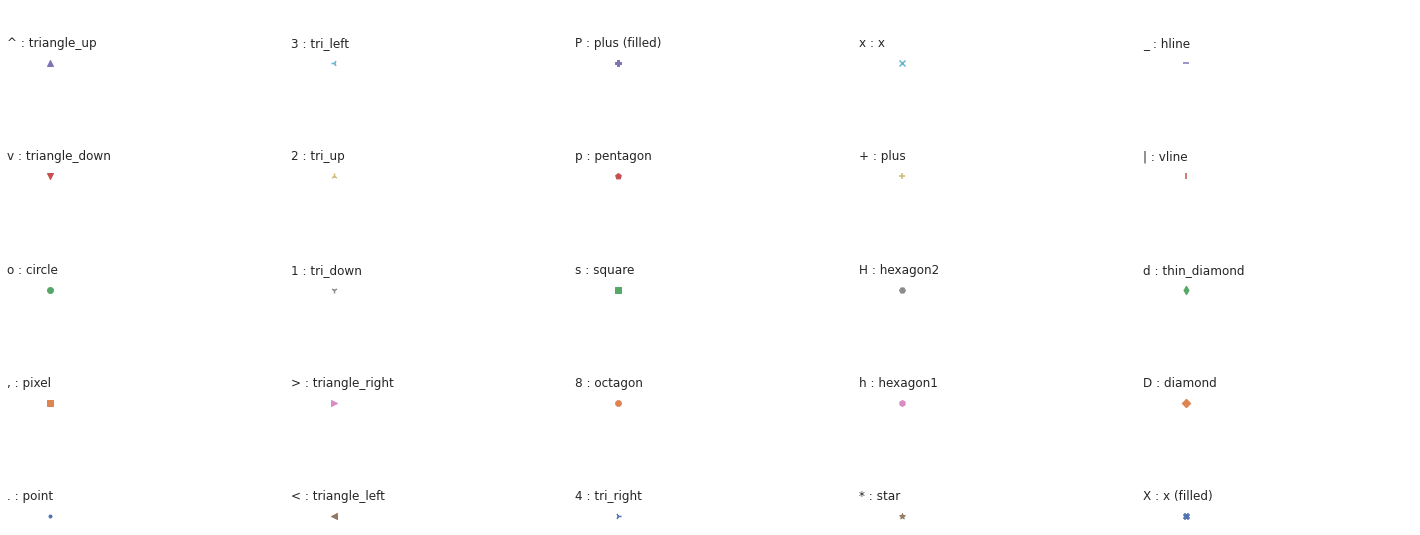

In [206]:
import matplotlib.pylab as plt
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
descriptions=['point', 'pixel', 'circle', 'triangle_down', 'triangle_up','triangle_left', 'triangle_right', 'tri_down', 'tri_up', 'tri_left','tri_right', 'octagon', 'square', 'pentagon', 'plus (filled)','star', 'hexagon1', 'hexagon2', 'plus', 'x', 'x (filled)','diamond', 'thin_diamond', 'vline', 'hline']
x=[]
y=[]
for i in range(5):
    for j in range(5):
        x.append(i)
        y.append(j)
plt.figure()
for i,j,m,l in zip(x,y,markers,descriptions):
    plt.scatter(i,j,marker=m)
    plt.text(i-0.15,j+0.15,s=m+' : '+l)
plt.axis([-0.1,4.8,-0.1,4.5])
plt.tight_layout()
plt.axis('off')
plt.show()  

In [215]:
ROOT_DIR = os.getcwd()
FINAL_MODEL_DIR = os.path.join(ROOT_DIR, 'results', 'models', 'final')
model_coef_file = f'{FINAL_MODEL_DIR}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A2_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

In [216]:
# sort by value
a2_coef_dict = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
a2_coef_dict

{'TNXB.5698.60': -0.41521543023737656,
 'APLP1.7210.25': -0.17193576801419938,
 'MICA.2730.58': -0.160647813075583,
 'TNR.11302.237': -0.11657627610329259,
 'CDH5.2819.23': -0.11267699138246812,
 'SLC5A8.13691.10': -0.10089457365003755,
 'NID2.16060.99': -0.0917440019953603,
 'CBS.10086.39': -0.08428213248506333,
 'TK2.19114.8': -0.08337762368417306,
 'ZNF134.12787.47': -0.07727172111392956,
 'RELL1.13399.33': -0.0680972531579681,
 'SMIM9.8888.33': -0.060639356889478344,
 'PRSS37.5653.23': -0.06013104427770501,
 'PRRG1.9008.6': -0.06001896703278262,
 'RAP1GAP.13735.1': -0.05767067153590051,
 'PLTP.15475.4': -0.057190334776238416,
 'PCYOX1.6431.68': -0.05674215755289051,
 'TIE1.2844.53': -0.05655300065867678,
 'ERP27.9333.59': -0.053423631996898514,
 'PRKCG.5476.66': -0.052648398255255316,
 'TBP.2875.15': -0.05261940456501501,
 'VCAN.9561.21': -0.049490456096568027,
 'ANXA13.17835.28': -0.04922353935778792,
 'NAGPA.11208.15': -0.03553800941896891,
 'ABO.9253.52': -0.035268754334428415,


In [217]:
a2_coef_dict.pop("age_at_diagnosis")
a2_coef_dict.pop("ProcessTime")

-0.013517750413849242

In [165]:
a2_var = list(a2_coef_dict.keys())
a2_vals = list(a2_coef_dict.values())


In [166]:
a2_var

['TNXB.5698.60',
 'APLP1.7210.25',
 'MICA.2730.58',
 'TNR.11302.237',
 'CDH5.2819.23',
 'SLC5A8.13691.10',
 'NID2.16060.99',
 'CBS.10086.39',
 'TK2.19114.8',
 'ZNF134.12787.47',
 'RELL1.13399.33',
 'SMIM9.8888.33',
 'PRSS37.5653.23',
 'PRRG1.9008.6',
 'RAP1GAP.13735.1',
 'PLTP.15475.4',
 'PCYOX1.6431.68',
 'TIE1.2844.53',
 'ERP27.9333.59',
 'PRKCG.5476.66',
 'TBP.2875.15',
 'VCAN.9561.21',
 'ANXA13.17835.28',
 'NAGPA.11208.15',
 'ABO.9253.52',
 'APOC1.15364.101',
 'SIRT2.5030.52',
 'GABBR2.9930.48',
 'CLEC6A.6911.103',
 'KIT.2475.1',
 'ZNRF3.10390.21',
 'CBLN1.9313.27',
 'CCDC25.18264.12',
 'CLSTN1.15521.4',
 'RNASE13.6424.2',
 'VASN.5682.13',
 'COL2A1.18875.125',
 'CKB.3800.71',
 'STK17B.5249.31',
 'CHI3L1.11104.13',
 'DAPK1.13955.33',
 'PRDX5.5017.19',
 'PSMB6.10530.8',
 'IFNL3.5713.9',
 'GP1BA.4990.87',
 'SLC26A7.13979.3',
 'PCDHGA12.6938.21',
 'DAG1.8369.102',
 'C18orf32.8236.8',
 'CCDC64.11158.40',
 'GIMAP6.19302.7',
 'RAB3A.17516.7',
 'HSPH1.17704.74',
 'DNAJC4.8016.19',
 'SETMAR

In [167]:
# rename proteins 
for i, k in enumerate(a2_var):
    if k == 'age_at_diagnosis':
        a2_var[i] = 'Age'
    elif k == 'ProcessTime':
        a2_var[i] = 'Process Time'
    else:
        a2_var[i] = k.split(".")[0]
a2_var

['TNXB',
 'APLP1',
 'MICA',
 'TNR',
 'CDH5',
 'SLC5A8',
 'NID2',
 'CBS',
 'TK2',
 'ZNF134',
 'RELL1',
 'SMIM9',
 'PRSS37',
 'PRRG1',
 'RAP1GAP',
 'PLTP',
 'PCYOX1',
 'TIE1',
 'ERP27',
 'PRKCG',
 'TBP',
 'VCAN',
 'ANXA13',
 'NAGPA',
 'ABO',
 'APOC1',
 'SIRT2',
 'GABBR2',
 'CLEC6A',
 'KIT',
 'ZNRF3',
 'CBLN1',
 'CCDC25',
 'CLSTN1',
 'RNASE13',
 'VASN',
 'COL2A1',
 'CKB',
 'STK17B',
 'CHI3L1',
 'DAPK1',
 'PRDX5',
 'PSMB6',
 'IFNL3',
 'GP1BA',
 'SLC26A7',
 'PCDHGA12',
 'DAG1',
 'C18orf32',
 'CCDC64',
 'GIMAP6',
 'RAB3A',
 'HSPH1',
 'DNAJC4',
 'SETMAR',
 'PTH1R',
 'ICAM5',
 'SEMA6C',
 'IFNA7',
 'CXCL13',
 'CDHR1',
 'TNNT2',
 'BRD4',
 'KRT7',
 'CXCL10',
 'SFTPD',
 'CCL7']

In [168]:
len(a2_var)
len(a2_vals)

67

Text(0.5, 1.0, 'Critical')

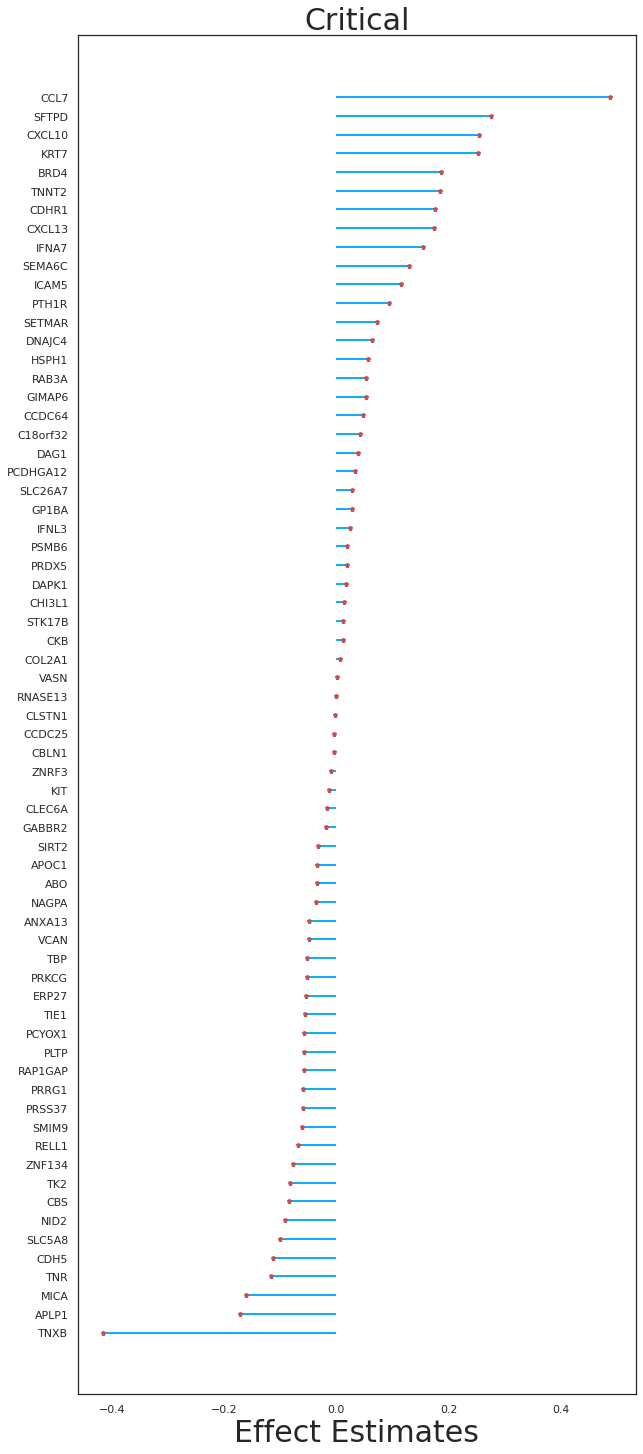

In [169]:
plt.subplots(figsize=(10,25))
plt.plot(a2_vals, a2_var, 'p', markersize=5, color = 'r')
plt.hlines(a2_var, [0], a2_vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Critical', fontsize=30)

In [218]:
# A3
model_coef_file = f'{FINAL_MODEL_DIR}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A3_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

In [219]:
# sort by value
a3_coef_dict = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
a3_coef_dict

{'CDH5.2819.23': -0.3368971589484298,
 'TNXB.5698.60': -0.1812977527458785,
 'HBZ.6919.3': -0.17954782076088066,
 'PSMA4.14099.20': -0.16563260532629695,
 'ITIH2.9326.33': -0.16509044085692107,
 'INSR.3448.13': -0.14528642666906244,
 'PLEKHA4.10939.16': -0.12792286393834845,
 'ZNRF3.10390.21': -0.12248799494863656,
 'LRFN2.7200.4': -0.11878675890348575,
 'CBLN1.9313.27': -0.10622626555459201,
 'LRP12.15506.34': -0.08896707293295818,
 'NAGPA.11208.15': -0.08442154824697451,
 'FCAMR.9568.289': -0.07673133650782087,
 'CD300E.10798.4': -0.07135501525095542,
 'UNC5A.7975.97': -0.06240561127331473,
 'AKR1C3.17377.1': -0.05837876534797778,
 'CD163.5028.59': -0.05650353270960789,
 'C21orf33.5981.6': -0.055786402385482284,
 'CA4.14069.61': -0.05488719176129402,
 'USP28.19562.8': -0.053031506262382296,
 'SPIN1.18210.12': -0.050581426616645,
 'WFDC6.13412.5': -0.03887901355727585,
 'GSTM1.15395.15': -0.03698092252848541,
 'RPS3A.5484.63': -0.03582789718386575,
 'LYVE1.3206.4': -0.0340247693288629

In [220]:
a3_coef_dict.pop("age_at_diagnosis")
a3_coef_dict.pop("ProcessTime")

-0.028600855085318715

In [177]:
a3_var = list(a3_coef_dict.keys())
a3_vals = list(a3_coef_dict.values())

In [178]:
# rename proteins 
for i, k in enumerate(a3_var):
    if k == 'age_at_diagnosis':
        a3_var[i] = 'Age'
    elif k == 'ProcessTime':
        a3_var[i] = 'Process Time'
    else:
        a3_var[i] = k.split(".")[0]
a3_var

['CDH5',
 'TNXB',
 'HBZ',
 'PSMA4',
 'ITIH2',
 'INSR',
 'PLEKHA4',
 'ZNRF3',
 'LRFN2',
 'CBLN1',
 'LRP12',
 'NAGPA',
 'FCAMR',
 'CD300E',
 'UNC5A',
 'AKR1C3',
 'CD163',
 'C21orf33',
 'CA4',
 'USP28',
 'SPIN1',
 'WFDC6',
 'GSTM1',
 'RPS3A',
 'LYVE1',
 'AGAP3',
 'SEMA3G',
 'CUTC',
 'PRR27',
 'FHL1',
 'TPM1',
 'MYSM1',
 'CSGALNACT2',
 'SH3GLB2',
 'EIF4EBP3',
 'CBS',
 'FGF8',
 'TIMD4',
 'POLM',
 'SYT9',
 'SMURF2',
 'HPX',
 'CD274',
 'SMIM13',
 'SETMAR',
 'TEAD4',
 'PLD5',
 'VEGFA',
 'CMBL',
 'DCUN1D3',
 'PLOD3',
 'DEFB136',
 'HMG20A',
 'SOX2',
 'DHX9',
 'RAB3A',
 'ZNF75D',
 'LGALS7',
 'BRD1',
 'RND1',
 'FBLN5',
 'MFAP4',
 'PGRMC2',
 'EDA',
 'CCL7',
 'KLB',
 'AOC1',
 'WARS',
 'RHPN2',
 'CDHR1',
 'BSG',
 'CDH12',
 'HSPA1L',
 'ERN1',
 'HOPX',
 'CCL8',
 'MGAT1',
 'PMS2',
 'MAGEA3',
 'ITM2C',
 'MX1',
 'CXCL13',
 'CRISPLD2',
 'NADK',
 'IFNA7',
 'STX3',
 'SEPT3',
 'PGF',
 'SULF2',
 'CAPN2',
 'SFTPD',
 'CXCL10']

In [179]:
len(a3_var)
len(a3_vals)

92

Text(0.5, 1.0, 'Severe')

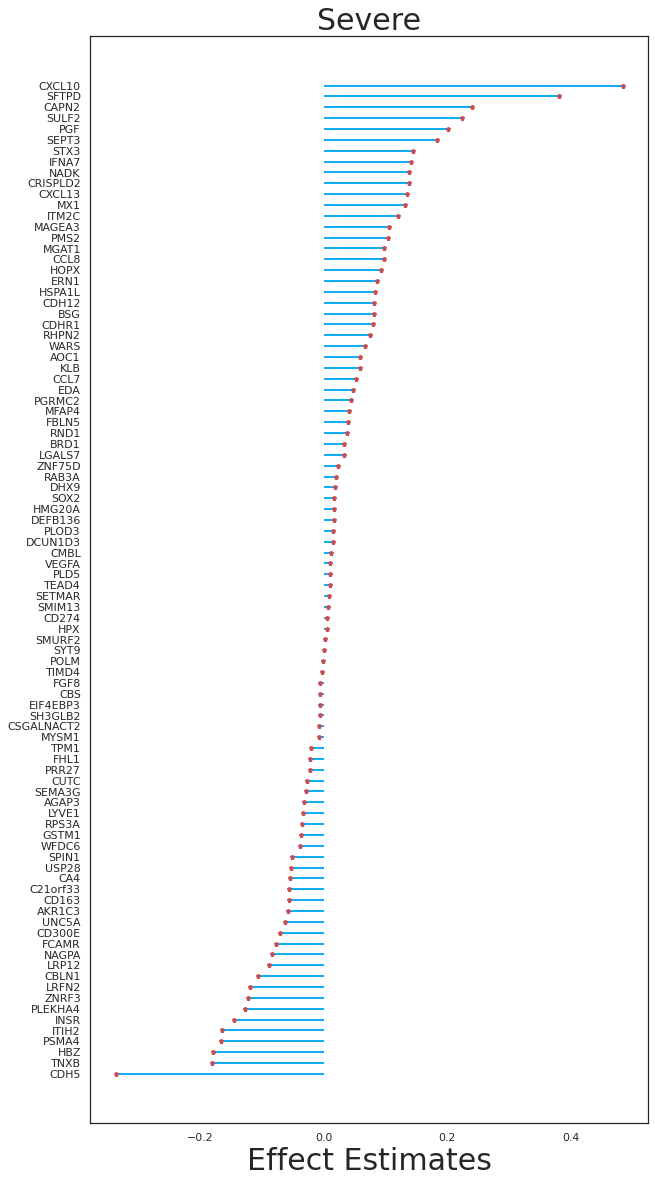

In [180]:
plt.subplots(figsize=(10,20))
plt.plot(a3_vals, a3_var, 'p', markersize=5, color = 'r')
plt.hlines(a3_var, [0], a3_vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Severe', fontsize=30)

# Plot UMAP

In [38]:
import seaborn as sns
sns.set_style("white")

data = 'infe'
outcome = 'A2'
nat_log_transf = 'True'
standardize = 'True'
model_type = 'lasso'

soma_data = 'normalized'
if soma_data == 'normalized':
    file_path = DAT_DIR + '/' + 'infe_417-soma_data=normalized-nat_log_tranf=FALSE-standardize=FALSE-remove_outliers=FALSE.csv'
elif soma_data == 'unnormalized':
    file_path = DAT_DIR + '/' + 'infe_417-soma_data=unnormalized-nat_log_tranf=FALSE-standardize=FALSE-remove_outliers=FALSE.csv'

df = pd.read_csv(file_path, low_memory=False)

X, y = split_x_y(df, outcome)
df = preprocess(X, nat_log_transf)  # age_at_diagnosis, sex_M, ProcessTime, SampleGroup, protein 1, ... , 5284

In [39]:

df = df.drop(['age_at_diagnosis', 'sex_M', 'ProcessTime', 'SampleGroup'], axis=1)

In [40]:
df.head()

,CRYBB2.10000.28,RAF1.10001.7,ZNF41.10003.15,ELK1.10006.25,GUCA1A.10008.43,OCRL.10011.65,SPDEF.10012.5,SNAI2.10014.31,KCNAB2.10015.119,POLH.10022.207,VDR.10023.32,HOGA1.10024.44,MUTYH.10030.8,DUSP4.10035.6,ZHX3.10036.201,SIGLEC12.10037.98,TP63.10040.63,HNF4A.10041.3,SGK3.10042.8,BRD4.10043.31,WNT10A.10044.12,CUL3.10045.47,BIRC2.10046.55,NCF2.10047.12,CBFB.10048.7,TERF1.10049.112,ILK.10053.5,GAN.10054.3,FOXM1.10056.5,RAD23A.10058.1,FANCL.10063.10,RBBP9.10064.12,PLCG2.10070.22,TDP1.10073.22,BRD2.10074.128,ACBD6.10075.75,AP4M1.10076.1,BAG3.10078.5,EIF2B1.10080.9,SATB2.10081.17,NEFL.10082.251,STAR.10085.25,CBS.10086.39,CRYAA.10087.10,APRT.10088.37,ASMTL.10089.7,STUB1.10336.3,ENO2.10339.48,PIAS4.10342.55,IL10RA.10344.334,STAT3.10346.5,JUN.10356.21,OAS1.10361.25,MYC.10362.35,SMAD3.10363.13,SMAD2.10364.6,IL12B.IL23A.10365.132,PDGFRA.10366.11,IL12A.IL12B.10367.62,STAT1.10370.21,STAT6.10372.18,ZNRF3.10390.21,ANGPTL3.10391.1,MCL1.10396.6,STX12.10418.36,SCARA5.10419.1,NPDC1.10424.31,B4GALT5.10425.3,GOSR2.10426.21,KIR2DS2.10428.1,SLC3A2.10430.31,KIAA1644.10432.3,AGA.10435.2,CSF2RA.10438.19,CLMP.10440.26,TMEM190.10442.1,APOM.10445.20,PABPC3.10447.18,SHISA2.10449.31,NUCB1.10451.11,CEACAM20.10453.7,DNAJC16.10454.99,IL31.10455.196,INSL5.10462.14,ANTXR1.10464.6,MAGEA4.10485.56,RPN1.10490.3,CLCA1.10496.11,TMEM106A.10499.1,PGRMC2.10506.53,ACRV1.10507.166,SCIMP.10510.62,COL6A3.10511.10,CSF2RB.10512.13,KCNIP3.10513.13,PTGDS.10514.5,MXRA8.10521.10,DHX9.10527.22,PSMB6.10530.8,NRAS.10531.18,PARP1.10534.40,COX6A2.10535.25,CD99L2.10539.30,TSPEAR.10546.2,BMPR1B.10550.37,LAT.10551.7,KLRC4.10552.88,TOR1AIP2.10553.8,GLB1.10554.23,TEX29.10557.6,PCDH9.10558.26,ITM2C.10560.1,PGLYRP3.10561.5,NETO2.10562.42,LYSMD3.10563.13,SLITRK3.10565.19,MFAP2.10569.28,MGAT1.10571.14,CST8.10572.65,B2M.10574.10,PUF60.10575.31,SFTA2.10580.14,POMK.10582.36,TMEM108.10583.1,NDUFS4.10584.7,ST3GAL5.10588.39,RAET1L.10589.7,CLGN.10600.24,HTN3.10603.1,APMAP.10605.22,TOR1AIP1.10606.34,HTN1.10608.9,PLOD3.10612.18,CASC4.10613.33,MPZ.10615.18,PODXL2.10616.67,LRP2.10618.190,MSMB.10620.21,PRR16.10621.26,MUC1.10623.19,SPINK13.10624.45,APLP2.10627.87,HTATIP2.10630.5,KIAA1324.10637.50,TINF2.10638.1,OLFM3.10643.16,ASCC1.10647.18,INSIG1.10663.42,GNPTG.10666.7,C1orf185.10667.78,STX4.10668.5,SFTPB.10672.75,TMX2.10675.223,NDUFB4.10677.9,KLRG2.10693.43,WFDC10B.10695.12,LRP1.10699.52,IGSF11.10700.10,COL28A1.10702.1,SUDS3.10703.203,LRMP.10704.91,ST6GALNAC3.10705.14,GNRH2.10708.3,ZPBP2.10710.23,CD300LB.10713.151,ACE.10714.7,PSMD5.10716.35,HSPA1A.10721.76,SYK.10722.13,HS3ST5.10731.10,GAL3ST2.10734.339,SERPINB1.10737.96,PCDHB2.10748.216,HSPA1A.10749.18,CDYL2.10752.8,ADAM7.10753.31,PROK2.10754.113,UCN3.10756.34,KERA.10758.2,GRIA4.10760.107,TMED2.10761.5,KLRG2.10762.2,GPR64.10767.52,CSGALNACT2.10772.21,CLEC4G.10781.19,LRRC52.10785.8,CD300E.10798.4,SERPINH1.10800.15,HSPA1A.10803.22,KLRB1.10809.14,CD1A.10814.7,HABP4.10815.2,PILRA.10816.150,TOMM20L.10817.26,SMPD1.10818.36,VSIG10.10825.12,LINGO3.10827.67,EFCAB14.10830.5,B4GALT6.10832.24,HHIP.10833.64,A4GNT.10835.25,GCNT4.10842.7,SIGLEC15.10847.1,BTNL3.10848.137,EBI3.10851.77,HNRNPDL.10852.114,SMEK1.10866.60,BRAT1.10876.300,FAM163B.10880.38,DSC1.10882.12,C6orf89.10885.36,MRAP2.10889.2,LCTL.10890.135,OSMR.10892.8,TMPRSS11B.10895.28,STMN2.10900.272,ASPRV1.10902.53,STX8.10903.50,NTM.10907.116,GALNT13.10908.2,CEACAM4.10910.6,PLA2R1.10916.44,GNGT2.10917.40,CYB5D2.10924.258,CALN1.10933.107,CD58.10938.13,PLEKHA4.10939.16,SRL.10940.25,STX6.10945.11,PLD3.10948.14,RPLP2.10949.59,CLEC2A.10953.14,CLEC10A.10955.4,GCSH.10956.82,BET1L.10959.125,RARRES3.10961.15,SPINK7.10974.20,MUCL1.10975.59,UCMA.10977.55,GH2.10978.39,NRG3.10981.56,LRRK2.10990.21,BGLAP.11067.13,IL5.11071.1,IGHA1.IGHA2.11089.7,CLC.11094.104,N6AMT1.11096.57,PDXK.11098.1,TLR4.11101.18,REG4.11102.22,...,PDGFD.9341.1,IL2RB.9343.16,WFDC13.9345.436,C1RL.9348.1,FSTL4.9350.3,CREG1.9357.4,DLK2.9359.9,EDIL3.9360.33,PCDHAC2.9361.7,CT55.9363.11,EYS.9365.91,IL21R.9366.54,LRTM1.9368.64,LRRC4C.9369.174,GGH.9370.69,MPZL2.9372.

In [41]:
prot = df.columns.tolist()

In [42]:
from sklearn.preprocessing import StandardScaler
# features = df[prot]

df_standardized = df.copy()
features = df[prot]
scaler = StandardScaler().fit(features.values)  # fit scaler on X_train
features = scaler.transform(features.values)
df_standardized[prot] = features
          

In [43]:
df_standardized.head()

,CRYBB2.10000.28,RAF1.10001.7,ZNF41.10003.15,ELK1.10006.25,GUCA1A.10008.43,OCRL.10011.65,SPDEF.10012.5,SNAI2.10014.31,KCNAB2.10015.119,POLH.10022.207,VDR.10023.32,HOGA1.10024.44,MUTYH.10030.8,DUSP4.10035.6,ZHX3.10036.201,SIGLEC12.10037.98,TP63.10040.63,HNF4A.10041.3,SGK3.10042.8,BRD4.10043.31,WNT10A.10044.12,CUL3.10045.47,BIRC2.10046.55,NCF2.10047.12,CBFB.10048.7,TERF1.10049.112,ILK.10053.5,GAN.10054.3,FOXM1.10056.5,RAD23A.10058.1,FANCL.10063.10,RBBP9.10064.12,PLCG2.10070.22,TDP1.10073.22,BRD2.10074.128,ACBD6.10075.75,AP4M1.10076.1,BAG3.10078.5,EIF2B1.10080.9,SATB2.10081.17,NEFL.10082.251,STAR.10085.25,CBS.10086.39,CRYAA.10087.10,APRT.10088.37,ASMTL.10089.7,STUB1.10336.3,ENO2.10339.48,PIAS4.10342.55,IL10RA.10344.334,STAT3.10346.5,JUN.10356.21,OAS1.10361.25,MYC.10362.35,SMAD3.10363.13,SMAD2.10364.6,IL12B.IL23A.10365.132,PDGFRA.10366.11,IL12A.IL12B.10367.62,STAT1.10370.21,STAT6.10372.18,ZNRF3.10390.21,ANGPTL3.10391.1,MCL1.10396.6,STX12.10418.36,SCARA5.10419.1,NPDC1.10424.31,B4GALT5.10425.3,GOSR2.10426.21,KIR2DS2.10428.1,SLC3A2.10430.31,KIAA1644.10432.3,AGA.10435.2,CSF2RA.10438.19,CLMP.10440.26,TMEM190.10442.1,APOM.10445.20,PABPC3.10447.18,SHISA2.10449.31,NUCB1.10451.11,CEACAM20.10453.7,DNAJC16.10454.99,IL31.10455.196,INSL5.10462.14,ANTXR1.10464.6,MAGEA4.10485.56,RPN1.10490.3,CLCA1.10496.11,TMEM106A.10499.1,PGRMC2.10506.53,ACRV1.10507.166,SCIMP.10510.62,COL6A3.10511.10,CSF2RB.10512.13,KCNIP3.10513.13,PTGDS.10514.5,MXRA8.10521.10,DHX9.10527.22,PSMB6.10530.8,NRAS.10531.18,PARP1.10534.40,COX6A2.10535.25,CD99L2.10539.30,TSPEAR.10546.2,BMPR1B.10550.37,LAT.10551.7,KLRC4.10552.88,TOR1AIP2.10553.8,GLB1.10554.23,TEX29.10557.6,PCDH9.10558.26,ITM2C.10560.1,PGLYRP3.10561.5,NETO2.10562.42,LYSMD3.10563.13,SLITRK3.10565.19,MFAP2.10569.28,MGAT1.10571.14,CST8.10572.65,B2M.10574.10,PUF60.10575.31,SFTA2.10580.14,POMK.10582.36,TMEM108.10583.1,NDUFS4.10584.7,ST3GAL5.10588.39,RAET1L.10589.7,CLGN.10600.24,HTN3.10603.1,APMAP.10605.22,TOR1AIP1.10606.34,HTN1.10608.9,PLOD3.10612.18,CASC4.10613.33,MPZ.10615.18,PODXL2.10616.67,LRP2.10618.190,MSMB.10620.21,PRR16.10621.26,MUC1.10623.19,SPINK13.10624.45,APLP2.10627.87,HTATIP2.10630.5,KIAA1324.10637.50,TINF2.10638.1,OLFM3.10643.16,ASCC1.10647.18,INSIG1.10663.42,GNPTG.10666.7,C1orf185.10667.78,STX4.10668.5,SFTPB.10672.75,TMX2.10675.223,NDUFB4.10677.9,KLRG2.10693.43,WFDC10B.10695.12,LRP1.10699.52,IGSF11.10700.10,COL28A1.10702.1,SUDS3.10703.203,LRMP.10704.91,ST6GALNAC3.10705.14,GNRH2.10708.3,ZPBP2.10710.23,CD300LB.10713.151,ACE.10714.7,PSMD5.10716.35,HSPA1A.10721.76,SYK.10722.13,HS3ST5.10731.10,GAL3ST2.10734.339,SERPINB1.10737.96,PCDHB2.10748.216,HSPA1A.10749.18,CDYL2.10752.8,ADAM7.10753.31,PROK2.10754.113,UCN3.10756.34,KERA.10758.2,GRIA4.10760.107,TMED2.10761.5,KLRG2.10762.2,GPR64.10767.52,CSGALNACT2.10772.21,CLEC4G.10781.19,LRRC52.10785.8,CD300E.10798.4,SERPINH1.10800.15,HSPA1A.10803.22,KLRB1.10809.14,CD1A.10814.7,HABP4.10815.2,PILRA.10816.150,TOMM20L.10817.26,SMPD1.10818.36,VSIG10.10825.12,LINGO3.10827.67,EFCAB14.10830.5,B4GALT6.10832.24,HHIP.10833.64,A4GNT.10835.25,GCNT4.10842.7,SIGLEC15.10847.1,BTNL3.10848.137,EBI3.10851.77,HNRNPDL.10852.114,SMEK1.10866.60,BRAT1.10876.300,FAM163B.10880.38,DSC1.10882.12,C6orf89.10885.36,MRAP2.10889.2,LCTL.10890.135,OSMR.10892.8,TMPRSS11B.10895.28,STMN2.10900.272,ASPRV1.10902.53,STX8.10903.50,NTM.10907.116,GALNT13.10908.2,CEACAM4.10910.6,PLA2R1.10916.44,GNGT2.10917.40,CYB5D2.10924.258,CALN1.10933.107,CD58.10938.13,PLEKHA4.10939.16,SRL.10940.25,STX6.10945.11,PLD3.10948.14,RPLP2.10949.59,CLEC2A.10953.14,CLEC10A.10955.4,GCSH.10956.82,BET1L.10959.125,RARRES3.10961.15,SPINK7.10974.20,MUCL1.10975.59,UCMA.10977.55,GH2.10978.39,NRG3.10981.56,LRRK2.10990.21,BGLAP.11067.13,IL5.11071.1,IGHA1.IGHA2.11089.7,CLC.11094.104,N6AMT1.11096.57,PDXK.11098.1,TLR4.11101.18,REG4.11102.22,...,PDGFD.9341.1,IL2RB.9343.16,WFDC13.9345.436,C1RL.9348.1,FSTL4.9350.3,CREG1.9357.4,DLK2.9359.9,EDIL3.9360.33,PCDHAC2.9361.7,CT55.9363.11,EYS.9365.91,IL21R.9366.54,LRTM1.9368.64,LRRC4C.9369.174,GGH.9370.69,MPZL2.9372.

In [44]:
df_standardized.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416
CRYBB2.10000.28,0.206489,0.712406,0.022042,-0.471772,0.232157,-0.433704,0.433932,-0.239117,0.306428,-0.390859,1.389594,0.251467,1.005844,-0.700002,0.985631,-0.391761,-0.161697,0.061732,0.200629,-0.406714,-0.607449,-0.284671,0.076752,-0.637029,0.312998,0.404236,-0.539774,-0.378704,-0.297181,-0.411721,-0.515280,-0.546061,-0.191597,-0.680354,0.325753,-0.543157,-0.516235,-0.733495,0.646862,0.264917,0.892305,0.642347,-0.558690,-0.378704,-0.794444,-0.542190,-0.346617,-0.398546,-0.691191,-0.304114,0.522781,-0.510985,0.816362,-0.472240,-0.499575,-0.459630,0.247754,-0.196551,0.002871,0.400142,-0.598007,-0.500523,-0.054116,0.124070,0.683208,0.321837,1.591573,-0.625450,-0.239117,-0.591570,0.311029,-0.049085,-0.732968,-0.456373,-0.733495,-0.668547,0.612772,-0.211897,0.325427,0.978852,0.454022,-0.958125,0.738250,-0.389956,0.115477,0.052153,-0.221490,-0.102690,0.179822,-0.513847,-0.114605,-0.285101,0.051415,1.065861,1.065161,0.457097,0.638955,-0.341314,-0.194485,-0.586138,0.202354,-0.383648,-0.168216,-0.617432,-0.565031,-0.742478,0.455253,-0.604960,-0.067718,-0.326359,-0.513847,0.023539,0.016796,-0.067328,-0.024100,0.568528,1.870143,-0.253914,0.088405,-0.489166,-0.246292,-0.398999,1.867876,-0.055278,-0.651207,0.548870,0.070171,0.660352,-0.330308,-0.290270,0.548870,-0.623443,-0.446629,-0.209817,-0.729280,-0.227769,-0.509080,0.123713,0.010409,-0.567475,0.182607,-0.316299,-0.344406,-0.092811,-0.564543,-0.395829,-0.019137,-0.343080,-0.570411,0.234878,-0.475990,-0.668547,-0.507175,-0.166584,-0.460096,0.278952,-0.247560,0.568820,-0.079053,3.352508,1.932843,-0.051018,-0.433243,0.146116,1.088356,-0.123383,-0.615931,-0.276084,-0.508603,0.179822,-0.657821,1.409429,2.712450,-0.187065,0.134054,-0.684992,-0.326797,-0.110229,-0.679325,-0.511939,-0.490111,-0.295019,-0.244602,-0.293723,-0.390407,-0.654766,-0.523414,0.089131,-0.206078,-0.450336,-0.468496,-0.496731,0.734190,-0.617932,-0.537843,-0.230286,0.842312,-0.613433,-0.610439,-0.563566,-0.288115,-0.782550,1.937871,-0.527253,-0.173117,-1.227321,-0.263693,0.582214,-0.170665,-0.404442,-0.092022,0.797224,-0.966900,0.051415,-0.459164,-0.319356,-0.581704,-0.388152,-0.553824,-0.135410,0.333891,-0.138629,-0.053728,2.062053,0.231136,0.518303,-0.266677,3.249616,-0.178030,0.132630,-0.335144,-0.070059,-0.583673,-0.608445,-0.208154,0.022042,-0.143869,0.055842,0.328361,-0.005830,0.584825,-0.014946,0.428336,1.016120,-0.688089,-0.535431,-0.450799,0.305770,-0.204418,0.327058,0.674595,-0.609

In [45]:
import umap
import umap.plot
reducer1 = umap.UMAP(random_state=42)

embedding = reducer1.fit_transform(df_standardized.T)  # if don't do this can't use umap.plot.points
embedding.shape


(4984, 2)

In [46]:
embedding

array([[ 9.221775 , -1.5821419],
       [ 1.6275586,  7.6639376],
       [ 6.2145367,  1.2257752],
       ...,
       [ 3.431002 ,  6.068259 ],
       [ 2.4068668,  6.72135  ],
       [ 1.2479424,  6.4037385]], dtype=float32)

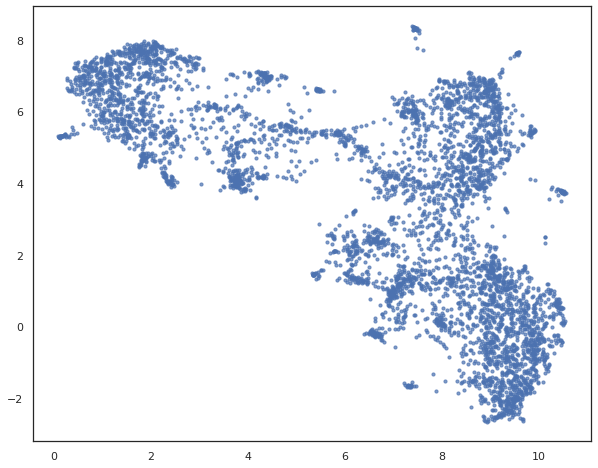

In [47]:
plt.subplots(figsize=(10,8))
plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        s=10,
        alpha= 0.7,
        color='b',
        #label=f'Top {idx*(i-1)} to {idx*i}'
    )
#plt.gca().set_aspect('equal', 'datalim')
# plt.legend(loc='best', shadow=False, scatterpoints=1,bbox_to_anchor=(1, 0.5))
# plt.title(f'UMAP projection of the Infe {outcome} - All samples', fontsize=24)

In [48]:
# Highlight A2 and A3 proteins
ROOT_DIR = os.getcwd()
FINAL_MODEL_DIR = os.path.join(ROOT_DIR, 'results', 'models', 'final')
a2_model_coef_file = f'{FINAL_MODEL_DIR}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A2_coef.pkl'
a2_model_coef = pickle.load(open(a2_model_coef_file, 'rb'))

a3_model_coef_file = f'{FINAL_MODEL_DIR}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A3_coef.pkl'
a3_model_coef = pickle.load(open(a3_model_coef_file, 'rb'))

a2_prot = list(a2_model_coef.keys())
a3_prot = list(a3_model_coef.keys())

In [49]:
a2_prot.remove('age_at_diagnosis')
a2_prot.remove('ProcessTime')
a3_prot.remove('age_at_diagnosis')
a3_prot.remove('ProcessTime')


In [50]:
print(len(a2_prot))
print(len(a3_prot))

67
92


In [51]:
# intersecting proteins
a2_prot_set = set(a2_prot)
intersection = a2_prot_set.intersection(a3_prot)
intersection_as_list = list(intersection)

print(intersection_as_list)

['SFTPD.19590.46', 'CXCL10.4141.79', 'RAB3A.17516.7', 'NAGPA.11208.15', 'CDH5.2819.23', 'IFNA7.14129.1', 'ZNRF3.10390.21', 'CBS.10086.39', 'CCL7.4886.3', 'SETMAR.12462.20', 'TNXB.5698.60', 'CDHR1.8372.29', 'CXCL13.3487.32', 'CBLN1.9313.27']


In [53]:
len(intersection_as_list)

14

In [56]:
# remove common proteins
a2_prot = [p for p in a2_prot if p not in intersection_as_list]
a3_prot = [p for p in a3_prot if p not in intersection_as_list]

In [57]:
print(len(a2_prot))
print(len(a3_prot))

53
78


In [58]:
a2_prot_idx = [prot.index(p) for p in a2_prot]
a3_prot_idx = [prot.index(p) for p in a3_prot]
common_prot_idx = [prot.index(p) for p in intersection_as_list]

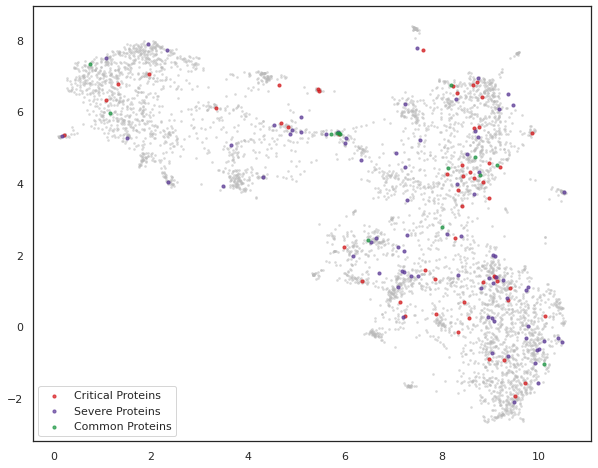

In [59]:
plt.subplots(figsize=(10,8))
plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        s=3,
        alpha= 0.4,
        color='#bababa',
        #label=f'Top {idx*(i-1)} to {idx*i}'
    )

# a2_proteins
plt.scatter(
        embedding[a2_prot_idx, 0],
        embedding[a2_prot_idx, 1],
        s=10,
        alpha= 0.7,
        color='#d7191c',
        label='Critical Proteins'
    )

# a3_proteins
plt.scatter(
        embedding[a3_prot_idx, 0],
        embedding[a3_prot_idx, 1],
        s=10,
        alpha= 0.7,
        color='#5e3c99',
        label='Severe Proteins'
    )
#d7191c
#fdae61
#abdda4
#2b83ba

# common_prot
plt.scatter(
        embedding[common_prot_idx, 0],
        embedding[common_prot_idx, 1],
        s=10,
        alpha= 0.7,
        color='#1a9641',
        label='Common Proteins'
    )

#plt.gca().set_aspect('equal', 'datalim')
plt.legend(loc='best', shadow=False, scatterpoints=1)
fig_path = os.path.join(PLOTS_DIR, f'umap.png')
plt.savefig(fig_path, bbox_inches='tight')

# plt.title(f'UMAP projection of the Infe {outcome} - All samples', fontsize=24)

## Supplementary Figure 2 - Plot Volcano

In [17]:
DIR = os.path.join(ROOT_DIR, 'results', 'all_proteins', 'age+sex+SampleGroup+ProcessTime+protlevel')  
file_path = DIR + '/' + '_infe_A2_LR_age+sex+SampleGroup+ProcessTime+protlevel_Analysis=all_proteins.xlsx'
results = pd.read_excel(file_path, engine='openpyxl')  # without engine, will not open
results

,Protein,OR,CIL,CUL,P,FDRp
0,NADK.13624.17,4.381712,3.147454,6.318733,7.568752e-17,2.368317e-13
1,VIM.15540.6,4.389099,3.149392,6.341864,9.503680e-17,2.368317e-13
2,CELF2.7245.2,3.667860,2.707154,5.104375,7.838308e-16,1.302204e-12
3,HDGFRP2.4553.65,3.469536,2.583522,4.782857,2.031527e-15,1.835297e-12
4,LST1.9531.24,3.783856,2.758249,5.336666,2.272982e-15,1.835297e-12
...,...,...,...,...,...,...
4979,RMDN1.7096.30,1.000530,0.764444,1.302039,9.968858e-01,9.975995e-01
4980,SORCS3.15637.38,0.999582,0.770059,1.245703,9.972070e-01,9.975995e-01
4981,IL3.4717.55,1.000399,0.778894,1.242627,9.972554e-01,9.975995e-01
4982,POLR2J.19199.3,0.999578,0.761647,1.274286,9.973993e-01,9.975995e-01


In [18]:
a2_data = results[['Protein', 'OR', 'P']]
a2_data = a2_data.rename(columns={"Protein": "GeneNames", "OR": "log2FC", "P": "p-value"})
a2_data['log2FC'] = np.log(a2_data['log2FC'])

In [19]:
a2_data['log2FC'].min()

-1.9548807824920742

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


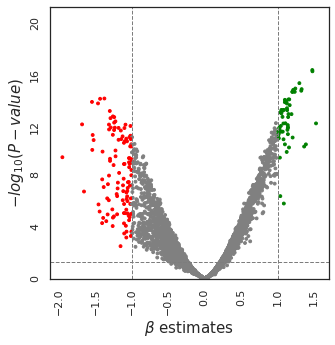

In [20]:
from bioinfokit import analys, visuz



visuz.gene_exp.volcano(df=a2_data, lfc='log2FC', pv='p-value', show=True, axxlabel=r'$\beta$ estimates', sign_line=True,
                      axlabelfontsize= 15,
                      axtickfontsize=11, 
                      ylm=(0,21,4))
# plot will be saved in same directory (volcano.png)
# set parameter show=True, if you want view the image instead of saving

#### A3

In [21]:
file_path = DIR + '/' + '_infe_A3_LR_age+sex+SampleGroup+ProcessTime+protlevel_Analysis=all_proteins.xlsx'
results = pd.read_excel(file_path, engine='openpyxl')  # without engine, will not open
results

,Protein,OR,CIL,CUL,P,FDRp
0,NADK.13624.17,4.424854,3.319783,6.042924,1.775245e-22,8.847823e-19
1,CXCL10.4141.79,3.446186,2.653862,4.562140,2.963990e-19,7.386263e-16
2,WARS.9870.17,3.810951,2.863807,5.199636,1.237314e-18,2.055592e-15
3,VIM.15540.6,4.083569,3.020601,5.670616,1.744722e-18,2.173923e-15
4,LST1.9531.24,3.635255,2.748445,4.916695,2.895675e-18,2.886409e-15
...,...,...,...,...,...,...
4979,CPVL.8891.7,0.999477,0.806872,1.222690,9.959781e-01,9.967781e-01
4980,PEX14.8300.82,0.999654,0.803142,1.240677,9.975020e-01,9.981028e-01
4981,DNAJC30.7866.11,0.999763,0.817711,1.223699,9.981258e-01,9.985265e-01
4982,PLA2G1B.4910.21,1.000184,0.809888,1.228665,9.986075e-01,9.988079e-01


In [22]:
a3_data = results[['Protein', 'OR', 'P']]
a3_data = a3_data.rename(columns={"Protein": "GeneNames", "OR": "log2FC", "P": "p-value"})
a3_data['log2FC'] = np.log(a3_data['log2FC'])

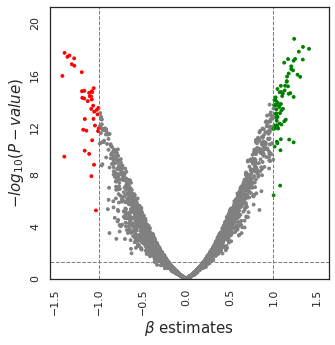

In [23]:
visuz.gene_exp.volcano(df=a3_data, lfc='log2FC', pv='p-value', show=True, axxlabel=r'$\beta$ estimates', sign_line=True, 
                       axlabelfontsize= 15,
                      axtickfontsize=11,
                      ylm=(0, 21, 4))
# plot will be saved in same directory (volcano.png)
# set parameter show=True, if you want view the image instead of saving

### Supplementary Figure 1: age/sex distribution

In [3]:
from models import split_x_y
from models import preprocess

import pandas as pd
import seaborn as sns
sns.set_style("white")

data = 'infe'
outcome = 'A2'
nat_log_transf = 'True'
standardize = 'True'
model_type = 'lasso'

soma_data = 'normalized'
if soma_data == 'normalized':
    file_path = DAT_DIR + '/' + 'infe_417-soma_data=normalized-nat_log_tranf=FALSE-standardize=FALSE-remove_outliers=FALSE.csv'
elif soma_data == 'unnormalized':
    file_path = DAT_DIR + '/' + 'infe_417-soma_data=unnormalized-nat_log_tranf=FALSE-standardize=FALSE-remove_outliers=FALSE.csv'

df = pd.read_csv(file_path, low_memory=False)

a2_X, a2_y = split_x_y(df, outcome)
a2_df = preprocess(a2_X, nat_log_transf)  # age_at_diagnosis, sex_M, ProcessTime, SampleGroup, protein 1, ... , 5284

outcome = 'A3'
a3_X, a3_y = split_x_y(df, outcome)
a3_df = preprocess(a3_X, nat_log_transf)  # age_at_diagnosis, sex_M, ProcessTime, SampleGroup, protein 1, ... , 5284



In [11]:
print((a3_y== 1).astype(int).sum(axis=0))
print((a3_y== 0).astype(int).sum(axis=0))



175
242


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.show()

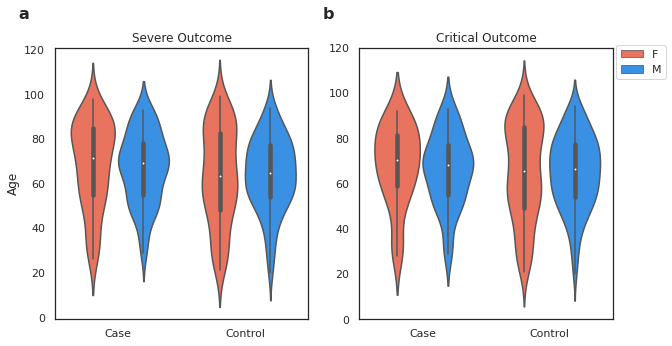

In [16]:
sns.set_theme(style="white")

a2_d = pd.concat([a2_df, a2_y], axis=1)
a2_d['A2'] = a2_d['A2'].map({1: 'Case', 0: 'Control'})  # replace 1 to case, 0 to control
a2_d['sex_M'] = a2_d['sex_M'].map({1: 'M', 0: 'F'})  # replace 1 to case, 0 to control

a3_d = pd.concat([a3_df, a3_y], axis=1)
a3_d['A3'] = a3_d['A3'].map({1: 'Case', 0: 'Control'})  # replace 1 to case, 0 to control
a3_d['sex_M'] = a3_d['sex_M'].map({1: 'M', 0: 'F'})  # replace 1 to case, 0 to control



fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# critical
sns.violinplot(ax=axes[1], x='A2', y='age_at_diagnosis', hue='sex_M',
                    palette=['tomato', 'dodgerblue'], data=a2_d)
axes[1].set_title('Critical Outcome')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([0,20,40,60,80,100,120])
axes[1].text(-0.1, 1.15, "b", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


sns.violinplot(ax=axes[0], x='A3', y='age_at_diagnosis', hue='sex_M',
                    palette=['tomato', 'dodgerblue'], data=a3_d)
axes[0].set_title('Severe Outcome')
axes[0].set_xlabel("")
axes[0].set_ylabel("Age")
axes[0].set_yticks([0,20,40,60,80,100,120])
axes[0].text(-0.1, 1.15, "a", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

axes[0].get_legend().remove()
axes[1].legend(loc='best', bbox_to_anchor=[1.23, 1.03])
# ax.set_title(f'{data} {outcome} age distribution')
plt.savefig(f'{PLOTS_DIR}/age_distribution.png', bbox_inches='tight')
# plt.show()

### Supplementary Figure 5: Baseline Model Coefficients

In [370]:
ROOT_DIR = os.getcwd()
FINAL_MODEL_DIR = os.path.join(ROOT_DIR, 'results', 'models', 'final')
model_coef_file = f'{FINAL_MODEL_DIR}/baseline-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A2_coef.pkl'
a2_model_coef = pickle.load(open(model_coef_file, 'rb'))

model_coef_file = f'{FINAL_MODEL_DIR}/baseline-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A3_coef.pkl'
a3_model_coef = pickle.load(open(model_coef_file, 'rb'))

In [371]:
a2_model_coef

{'age_at_diagnosis': 0.008316909126226835,
 'sex_M': 0.4429685557483413,
 'ProcessTime': -0.034606220285538405,
 'SampleGroup': -0.34074553570558064}

In [372]:
# convert coefficients to abs value
for k,v in a2_model_coef.items():
    a2_model_coef[k] = abs(v)

for k,v in a3_model_coef.items():
    a3_model_coef[k] = abs(v)

In [373]:
# sort in order
a2_baseline = {k: v for k, v in sorted(a2_model_coef.items(), key=lambda item: item[1])}
a3_baseline = {k: v for k, v in sorted(a3_model_coef.items(), key=lambda item: item[1])}

In [374]:
a2_baseline

{'age_at_diagnosis': 0.008316909126226835,
 'ProcessTime': 0.034606220285538405,
 'SampleGroup': 0.34074553570558064,
 'sex_M': 0.4429685557483413}

In [393]:
# rename variables 
def rename_var(var):
    for i, k in enumerate(var):
        if k == 'age_at_diagnosis':
            var[i] = 'Age'
        elif k == 'sex_M':
            var[i] = 'Sex'
        elif k == 'ProcessTime':
            var[i] = 'Process Time'
        elif k == 'SampleGroup':
            var[i] = 'Hospital Site'
    return var

In [394]:
a2_y_val = list(a2_baseline.keys())
a3_y_val = list(a3_baseline.keys())

a2_var = rename_var(a2_y_val)
a3_var = rename_var(a3_y_val)

In [395]:
a2_var

['Age', 'Process Time', 'Hospital Site', 'Sex']

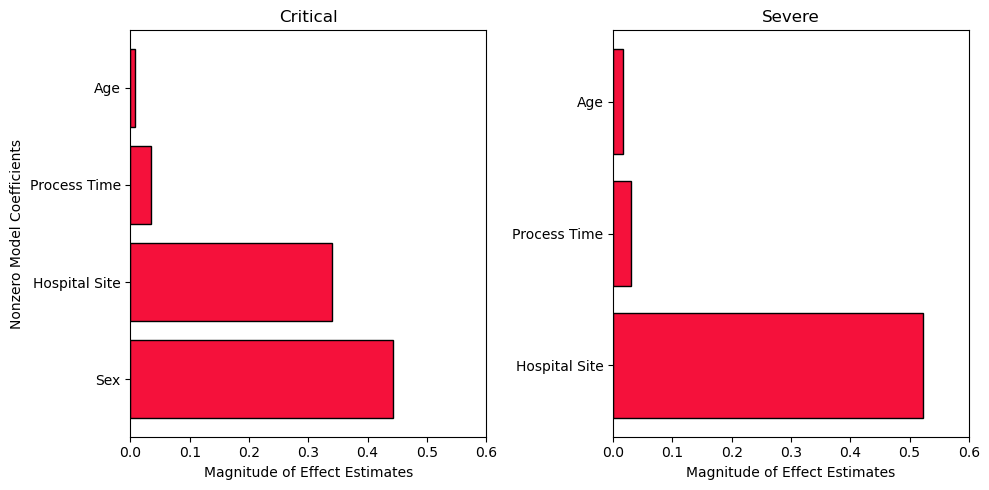

In [422]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

y_pos = np.arange(len(a2_var))
x_val = list(a2_baseline.values())
axes[0].barh(y_pos, x_val, align='center', color='#f5113b', edgecolor='black')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(a2_var)
axes[0].invert_yaxis()  # labels read top-to-bottom
axes[0].set_title('Critical')
axes[0].set_xticks([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axes[0].set_ylabel('Nonzero Model Coefficients')
axes[0].set_xlabel('Magnitude of Effect Estimates')

y_pos = np.arange(len(a3_var))
x_val = list(a3_baseline.values())
axes[1].barh(y_pos, x_val, align='center', color='#f5113b', edgecolor='black')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(a3_var)
axes[1].invert_yaxis()  # labels read top-to-bottom
axes[1].set_title('Severe')
axes[1].set_xticks([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axes[1].set_xlabel('Magnitude of Effect Estimates')

fig.tight_layout()

# # critical
# sns.violinplot(ax=axes[0], x='A2', y='age_at_diagnosis', hue='sex_M',
#                     palette=['tomato', 'dodgerblue'], data=a2_d)
# axes[0].set_title('Critical Outcome')
# axes[0].set_xlabel("")
# axes[0].set_ylabel("Age")
# axes[0].set_yticks([0,20,40,60,80,100,120])

# sns.violinplot(ax=axes[1], x='A3', y='age_at_diagnosis', hue='sex_M',
#                     palette=['tomato', 'dodgerblue'], data=a3_d)
# axes[1].set_title('Severe Outcome')
# axes[1].set_xlabel("")
# axes[1].set_ylabel("")
# axes[1].set_yticks([0,20,40,60,80,100,120])

# axes[0].get_legend().remove()

# axes[1].legend(loc='best', bbox_to_anchor=[1.23, 1.03])
# # ax.set_title(f'{data} {outcome} age distribution')
# plt.savefig(f'{PLOTS_DIR}/age_distribution.png', bbox_inches='tight')
# # plt.show()

## Plot Sensitivity Analysis Coefficients

51


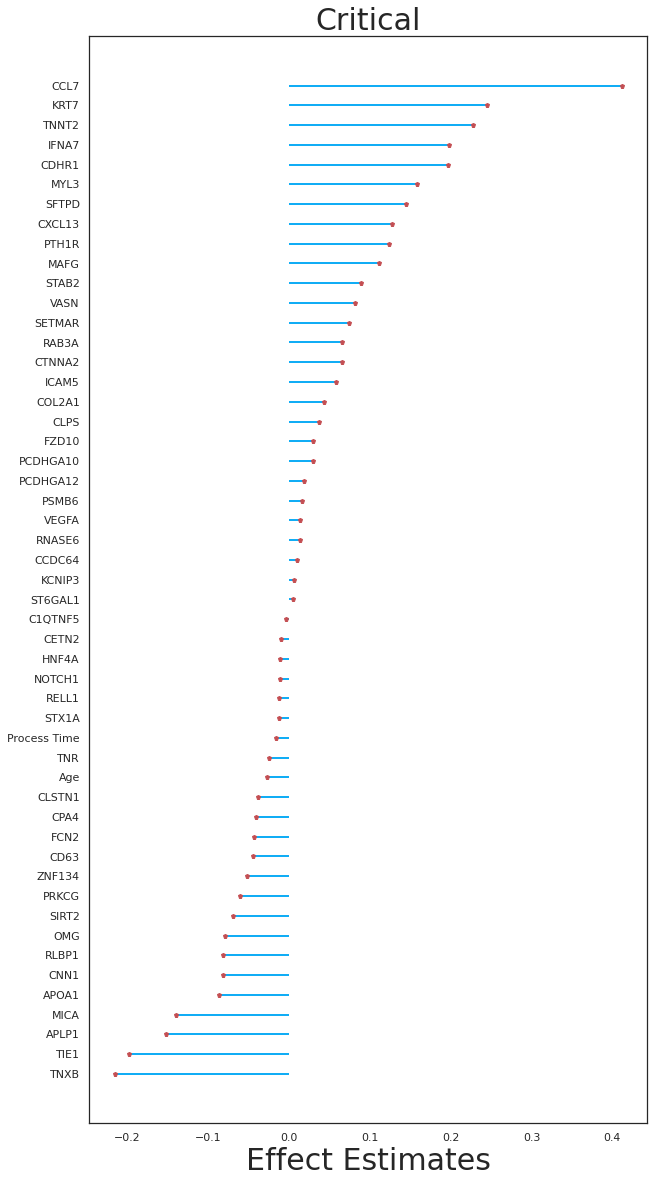

In [60]:
# A2

import os
import pickle
import matplotlib.pyplot as plt

ROOT_DIR = os.getcwd()  # .../somalogic

final_model_dir = os.path.join(ROOT_DIR, 'results', 'models', 'sensitivity_analysis', 'final')

model_coef_file = f'{final_model_dir}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A2_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

# sort by value
x = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
x

var = list(x.keys())
vals = list(x.values())

# rename proteins 
for i, k in enumerate(var):
    if k == 'age_at_diagnosis':
        var[i] = 'Age'
    elif k == 'ProcessTime':
        var[i] = 'Process Time'
    else:
        var[i] = k.split(".")[0]
var

plt.subplots(figsize=(10,20))
plt.plot(vals, var, 'p', markersize=5, color = 'r')
plt.hlines(var, [0], vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Critical', fontsize=30)
print(len(var))

79


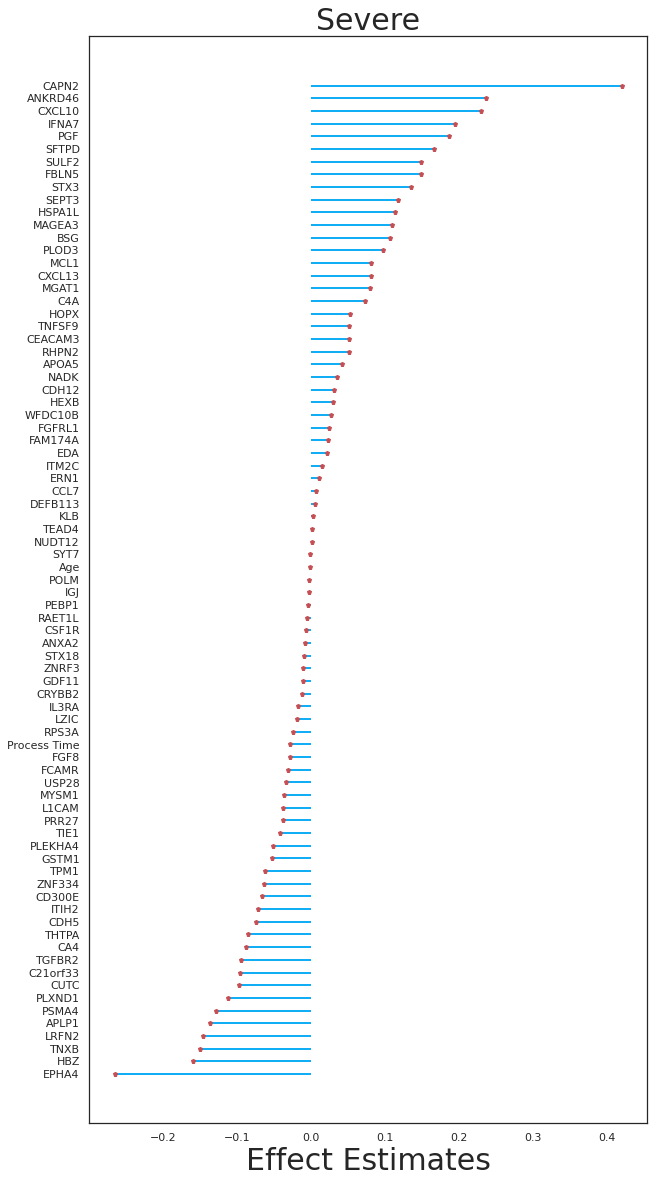

In [61]:
# A3
model_coef_file = f'{final_model_dir}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A3_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

# sort by value
x = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
x

var = list(x.keys())
vals = list(x.values())

# rename proteins 
for i, k in enumerate(var):
    if k == 'age_at_diagnosis':
        var[i] = 'Age'
    elif k == 'ProcessTime':
        var[i] = 'Process Time'
    else:
        var[i] = k.split(".")[0]
var

plt.subplots(figsize=(10,20))
plt.plot(vals, var, 'p', markersize=5, color = 'r')
plt.hlines(var, [0], vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Severe', fontsize=30)
print(len(var))

## Sensitivity Analysis1 Coefficients

69


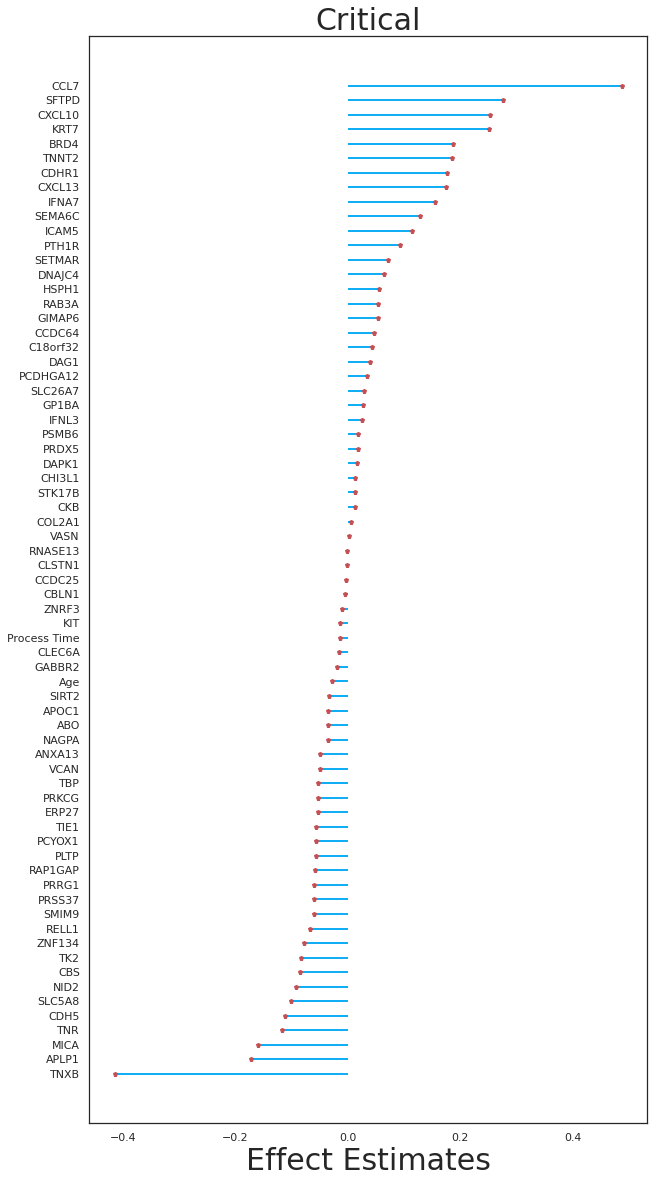

In [62]:
# A2

final_model_dir = os.path.join(ROOT_DIR, 'results', 'models', 'sensitivity_analysis1', 'final')

model_coef_file = f'{final_model_dir}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A2_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

# sort by value
x = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
x

var = list(x.keys())
vals = list(x.values())

# rename proteins 
for i, k in enumerate(var):
    if k == 'age_at_diagnosis':
        var[i] = 'Age'
    elif k == 'ProcessTime':
        var[i] = 'Process Time'
    else:
        var[i] = k.split(".")[0]
var

plt.subplots(figsize=(10,20))
plt.plot(vals, var, 'p', markersize=5, color = 'r')
plt.hlines(var, [0], vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Critical', fontsize=30)
print(len(var))

95


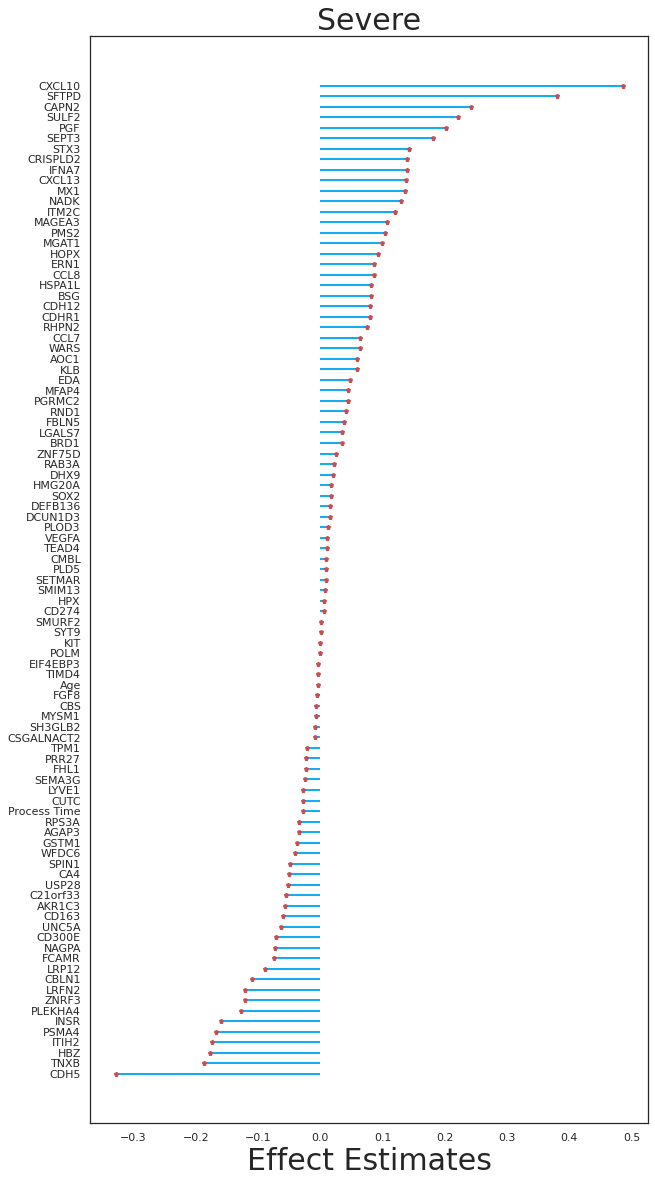

In [63]:
# A3

final_model_dir = os.path.join(ROOT_DIR, 'results', 'models', 'sensitivity_analysis1', 'final')

model_coef_file = f'{final_model_dir}/all_proteins-soma_data=normalized-nat_log_transf=True-standardize=True_infe_A3_coef.pkl'
model_coef = pickle.load(open(model_coef_file, 'rb'))

# sort by value
x = {k: v for k, v in sorted(model_coef.items(), key=lambda item: item[1])}
x

var = list(x.keys())
vals = list(x.values())

# rename proteins 
for i, k in enumerate(var):
    if k == 'age_at_diagnosis':
        var[i] = 'Age'
    elif k == 'ProcessTime':
        var[i] = 'Process Time'
    else:
        var[i] = k.split(".")[0]
var

plt.subplots(figsize=(10,20))
plt.plot(vals, var, 'p', markersize=5, color = 'r')
plt.hlines(var, [0], vals, linestyles='solid', lw=2, color='#11adf5')
plt.xlabel("Effect Estimates", fontsize=30)
plt.title('Severe', fontsize=30)
print(len(var))

# Get Youden Js

In [65]:
def mean(lst):
    return sum(lst) / len(lst)


In [25]:
# Baseline A2 for C = 100, lambda = 0.01
best_thresholds = [0.34199967849852536, 0.1439736288982057, 0.18355629137300472, 0.24291969437292077, 0.21902273515465112, 0.1874542511533905, 0.17110931870508478, 0.19949611673533155, 0.19667574003873017, 0.15791670970693739, 0.1773602018634055, 0.22584628562147518, 0.18971668529502836, 0.19976018268713366, 0.23843748624946579, 0.23062367764620567, 0.17022902784368807, 0.1473319892527563, 0.2521194231516588, 0.18670325582510194, 0.21640281503804554, 0.2266708623078629, 0.24990237616553312, 0.1644960198996866, 0.16759939020295578, 0.18362080937640363, 0.1840152053574082, 0.222134124000165, 0.20334713881920832, 0.25773329331470685, 0.20873447428432854, 0.16657503522180828, 0.1990712681905926, 0.24265710608035373, 0.10115685062062123, 0.20488365255146954, 0.2298280966855047, 0.19451154962612882, 0.17506615990218571, 0.161574223632797, 0.1891457555594562, 0.28009685842443155, 0.23726965200113154, 0.18528054367634528, 0.16415483872730713, 0.2244644854833131, 0.15845996385668498, 0.18741175290933829, 0.2478803253468068, 0.19141658283531013]
best_youden_js = [0.14898785425101213, 0.19999999999999996, 0.22861842105263153, 0.3247863247863248, 0.28547008547008546, 0.2639676113360324, 0.24858299595141697, 0.24259868421052633, 0.2581196581196581, 0.20598290598290592, 0.11902834008097163, 0.345748987854251, 0.33223684210526316, 0.31965811965811963, 0.19572649572649575, 0.17004048582995945, 0.29230769230769227, 0.14473684210526316, 0.45128205128205123, 0.20256410256410262, 0.32550607287449396, 0.27125506072874495, 0.28207236842105265, 0.1811965811965811, 0.29230769230769227, 0.2510121457489879, 0.23319838056680164, 0.22121710526315785, 0.20512820512820507, 0.36837606837606834, 0.3627530364372469, 0.29230769230769227, 0.3108552631578947, 0.3495726495726496, 0.05213675213675206, 0.46396761133603237, 0.19838056680161942, 0.2639802631578947, 0.20256410256410262, 0.1811965811965811, 0.2178137651821862, 0.22105263157894733, 0.3248355263157895, 0.1811965811965811, 0.29829059829059823, 0.35870445344129553, 0.1935222672064777, 0.21134868421052633, 0.45128205128205123, 0.1564102564102564]

mean_best_thresholds = mean(best_thresholds)
mean_best_youden_js = mean(best_youden_js)
print(mean_best_thresholds)
print(mean_best_youden_js)


0.20175627180341194
0.2580777103013945


In [26]:


# Protein Model A2 for C = 0.1, lambda = 10
best_thresholds = [0.15665233125693048, 0.3147513893777965, 0.23863133432928788, 0.2550642038510522, 0.32671219600357, 0.2710005202629521, 0.2685935749200353, 0.4176953740948217, 0.2285481760218638, 0.1865212086009137, 0.3128806794538077, 0.16119821002289383, 0.27988562204127876, 0.237179524735195, 0.19169723366997718, 0.2561619029905415, 0.25350980723359823, 0.19045380892043448, 0.3061383853240021, 0.10955578730556077, 0.27448655695126867, 0.34245423843703604, 0.29018491489050285, 0.37840979519981854, 0.13930850165058098, 0.31743251912182496, 0.24744882929151205, 0.19325439010576714, 0.29890437483962784, 0.15536223864999013, 0.18259155715292877, 0.1873496842227065, 0.23880686236271106, 0.2866687934828119, 0.27370314410915497, 0.45572342825946743, 0.2768838066474219, 0.12710516926259957, 0.1823342119019227, 0.19471621768543126, 0.19775016458082517, 0.253880584206264, 0.3333286009297065, 0.17960097826644383, 0.09571841581607038, 0.22514780176482088, 0.4157284922320055, 0.34932842121583474, 0.3321967563211312, 0.3409164697483621]
best_youden_js = [0.57165991902834, 0.7781376518218623, 0.6332236842105263, 0.7256410256410257, 0.7504273504273504, 0.7190283400809716, 0.7433198380566801, 0.6957236842105263, 0.6735042735042734, 0.6427350427350427, 0.6421052631578947, 0.7012145748987854, 0.7639802631578947, 0.6948717948717948, 0.47606837606837604, 0.7935222672064777, 0.7036437246963563, 0.6973684210526315, 0.6452991452991452, 0.6153846153846154, 0.7627530364372469, 0.6753036437246963, 0.6800986842105263, 0.7504273504273504, 0.6025641025641026, 0.6291497975708502, 0.6048582995951417, 0.6817434210526315, 0.7410256410256411, 0.7538461538461538, 0.6858299595141699, 0.620242914979757, 0.6644736842105263, 0.6487179487179487, 0.7042735042735042, 0.7587044534412956, 0.725506072874494, 0.703125, 0.5811965811965811, 0.617948717948718, 0.7165991902834008, 0.8, 0.6332236842105263, 0.805982905982906, 0.5692307692307692, 0.7538461538461538, 0.6817813765182186, 0.6899671052631579, 0.5435897435897435, 0.7564102564102564]

mean_best_thresholds = mean(best_thresholds)
mean_best_youden_js = mean(best_youden_js)
print(mean_best_thresholds)
print(mean_best_youden_js)


0.2545911437944613
0.6841855881691408


In [66]:

# Baseline A3 for C = 10^(1.5), lambda = 0.03
best_thresholds = [0.4515671902063464, 0.3722774043832197, 0.4777652838139568, 0.5713189353022884, 0.39144280880962445, 0.3800313535305521, 0.42119058636213025, 0.4907333948675155, 0.35585880113142015, 0.3926410878395345, 0.43846017424962175, 0.41214667966068047, 0.37893849473273616, 0.3879444281767399, 0.38252910816135427, 0.43239745085196474, 0.3872719417705226, 0.36344314938451716, 0.42931531723562766, 0.4322411223877829, 0.26745489687028917, 0.40963948254466476, 0.44911418901946737, 0.36232933665436395, 0.4768883966671437, 0.42777163554788405, 0.34555242090491073, 0.40451546204624467, 0.5242962170209198, 0.4013469536155953, 0.4802458093191484, 0.38496533020195967, 0.4628225932289428, 0.3843497934291117, 0.44523538446950844, 0.3596547805937829, 0.29681452907033434, 0.4109617814449192, 0.42693915404241883, 0.3897915432842805, 0.4482663247790217, 0.43198696102172923, 0.3854605071747678, 0.5428965458566634, 0.3152227795877313, 0.41073686352913985, 0.4761940564504691, 0.4284089945785014, 0.4775335799568605, 0.4637805058135598]
best_youden_js = [0.17142857142857143, 0.1428571428571429, 0.3113095238095238, 0.12976190476190477, 0.2583333333333334, 0.2081632653061225, 0.1673469387755102, 0.30357142857142855, 0.19285714285714284, 0.286904761904762, 0.26530612244897955, 0.18367346938775508, 0.21904761904761905, 0.25297619047619047, 0.2791666666666667, 0.31020408163265306, 0.2775510204081634, 0.19345238095238093, 0.21964285714285714, 0.24821428571428572, 0.12653061224489792, 0.24081632653061225, 0.33154761904761904, 0.28154761904761905, 0.15773809523809523, 0.35510204081632657, 0.11020408163265305, 0.07678571428571423, 0.25416666666666665, 0.42738095238095236, 0.14285714285714285, 0.2489795918367348, 0.17857142857142855, 0.1880952380952381, 0.2767857142857143, 0.13877551020408163, 0.08571428571428574, 0.2636904761904762, 0.3392857142857143, 0.1595238095238095, 0.2979591836734694, 0.37551020408163266, 0.35952380952380947, 0.08273809523809522, 0.13571428571428568, 0.24081632653061225, 0.22448979591836732, 0.23511904761904762, 0.17083333333333336, 0.20178571428571423]

mean_best_thresholds = mean(best_thresholds)
mean_best_youden_js = mean(best_youden_js)
print(mean_best_thresholds)
print(mean_best_youden_js)


0.41681383043164943
0.2266071428571429


In [67]:

# Protein Model A3 for C = 10**(-1.0), lambda = 10.0
best_thresholds = [0.4593527937794705, 0.3670230429813028, 0.6917510866210076, 0.4404633082462828, 0.3245064076475314, 0.39037805975584106, 0.29475468170432323, 0.5445563212357452, 0.4099889473121736, 0.4417858597128291, 0.5809218237756602, 0.5077618167933159, 0.3872179287609151, 0.4913577944022751, 0.7277579869217543, 0.5824991130847389, 0.5983791984404776, 0.42082305910021056, 0.36749051492891843, 0.49241727992793605, 0.431132850418426, 0.4161307659071757, 0.4723523858679672, 0.1481940974139919, 0.49718523547120935, 0.5210047034625308, 0.573934927684269, 0.30394287031698636, 0.6275969759373283, 0.42294831122769644, 0.47226888924608373, 0.4874316761164598, 0.42226554161972263, 0.6584109586729636, 0.4465416612986415, 0.4358689786286026, 0.6732925593412994, 0.6482636309246645, 0.40377291216828426, 0.4573447645291979, 0.4650378389973323, 0.6923190202308398, 0.5765777135638598, 0.3289590862493601, 0.636226442334692, 0.35814292884890087, 0.5339436759983847, 0.5784346765439672, 0.48213598808148905, 0.6181872742607037]
best_youden_js = [0.726530612244898, 0.6326530612244897, 0.5660714285714286, 0.656547619047619, 0.6303571428571428, 0.6244897959183674, 0.6612244897959183, 0.6023809523809524, 0.6434523809523809, 0.719047619047619, 0.7673469387755103, 0.5673469387755102, 0.6851190476190476, 0.7607142857142857, 0.5869047619047619, 0.653061224489796, 0.5551020408163265, 0.6333333333333334, 0.6047619047619048, 0.7529761904761905, 0.6612244897959183, 0.5959183673469388, 0.7684523809523809, 0.6303571428571428, 0.5708333333333334, 0.6408163265306123, 0.7755102040816326, 0.6071428571428571, 0.6672619047619048, 0.7529761904761905, 0.6857142857142857, 0.6979591836734694, 0.656547619047619, 0.5529761904761905, 0.6696428571428571, 0.5918367346938775, 0.6244897959183674, 0.6077380952380952, 0.7738095238095237, 0.7684523809523809, 0.6857142857142857, 0.6081632653061224, 0.6488095238095237, 0.5863095238095237, 0.6517857142857143, 0.636734693877551, 0.6693877551020408, 0.6517857142857143, 0.6279761904761905, 0.7297619047619048]

mean_best_thresholds = mean(best_thresholds)
mean_best_youden_js = mean(best_youden_js)
print(mean_best_thresholds)
print(mean_best_youden_js)


0.48622072732991467
0.6565102040816329


# Plot Figure 3

In [234]:
corr_file_path = os.path.join(DAT_DIR, 'a2_a3_corr.csv')
corr = pd.read_csv(corr_file_path)
corr  # rows = A3 proteins, cols = A2 proteins

,Unnamed: 0,BRD4,CBS,ZNRF3,PSMB6,CHI3L1,CCDC64,NAGPA,TNR,KRT7,SETMAR,ZNF134,RELL1,PTH1R,SLC5A8,RAP1GAP,DAPK1,SLC26A7,IFNA7,APOC1,PLTP,CLSTN1,NID2,RAB3A,HSPH1,ANXA13,CCDC25,COL2A1,TK2,GIMAP6,SFTPD,KIT,MICA,CDH5,TIE1,TBP,CXCL13,CKB,CXCL10,CCL7,GP1BA,PRDX5,SIRT2,STK17B,TNNT2,PRKCG,PRSS37,VASN,TNXB,IFNL3,RNASE13,PCYOX1,CLEC6A,PCDHGA12,SEMA6C,APLP1,DNAJC4,C18orf32,ICAM5,DAG1,CDHR1,SMIM9,PRRG1,ABO,CBLN1,ERP27,VCAN,GABBR2
0,CBS,-0.302109,1.000000,0.053841,-0.050949,-0.291743,-0.109091,0.361959,0.272999,-0.157978,-0.230708,0.257983,0.164837,-0.297018,0.238075,0.269604,-0.160422,-0.307065,0.153960,0.148657,-0.176081,0.084994,0.201055,0.067725,-0.020396,0.261939,0.169222,0.144371,0.247564,0.082649,-0.231207,0.140995,-0.023529,0.154302,0.075705,0.030463,-0.016430,-0.280452,-0.024235,-0.070093,-0.096161,0.096356,0.256792,0.020675,-0.350393,0.245344,0.028052,-0.326662,0.164525,0.103647,0.191122,0.139943,0.180791,-0.354720,0.072747,0.208814,0.042869,0.020446,-0.132131,-0.165302,-0.155022,0.240750,-0.063069,0.116469,0.075377,0.034428,0.212279,0.209584
1,ZNRF3,-0.215776,0.053841,1.000000,-0.086370,0.006614,-0.296971,0.032943,0.012617,-0.194461,-0.281828,0.018827,-0.085468,-0.278182,0.040817,0.278470,0.375308,-0.098048,-0.198928,0.121067,0.147780,-0.048591,0.164443,0.357367,0.108163,0.109921,0.009303,0.171738,0.389288,-0.210961,-0.114263,0.015942,0.180236,0.095984,0.040688,-0.165024,-0.204001,-0.332730,-0.263651,-0.266870,-0.033468,0.026474,0.105585,0.018982,-0.127555,-0.030927,-0.174123,-0.098217,0.124820,-0.209844,0.144369,0.110192,-0.013348,-0.136847,-0.211883,0.019231,0.099275,-0.204294,-0.040147,-0.269832,-0.291872,0.247702,0.012338,-0.017670,0.004765,-0.169838,0.017860,0.077774
2,PGRMC2,0.104937,-0.182448,0.111292,-0.258316,-0.075982,-0.016803,-0.066539,-0.253687,-0.057666,0.029160,-0.300148,-0.198268,0.108524,-0.198861,-0.030061,0.429459,0.058008,-0.243936,-0.031147,0.232321,-0.180988,0.254599,0.327318,0.171268,-0.246008,-0.027540,0.002256,0.230873,-0.434267,0.121661,-0.009874,0.065179,-0.129795,-0.033417,-0.301785,-0.266632,-0.053833,-0.016544,0.010935,0.139792,-0.104501,-0.029885,0.007682,-0.011865,-0.261460,-0.247074,0.132267,-0.062961,-0.241493,-0.122069,0.058360,-0.358095,0.030456,-0.345606,-0.274243,0.027171,-0.118334,-0.001830,-0.250252,-0.176901,0.142763,0.161396,-0.195903,-0.145075,-0.215203,-0.343840,-0.195282
3,DHX9,-0.286271,0.182856,0.124780,0.208253,-0.116848,-0.181654,0.106158,0.387179,0.041862,-0.260287,0.294635,0.111740,-0.334540,0.171743,0.157826,-0.110148,-0.264428,0.088878,0.084224,-0.033661,0.001737,-0.058478,0.158839,0.032898,0.250361,0.092303,0.139403,0.168859,0.169690,-0.062986,-0.035009,0.063783,0.106143,0.079777,-0.104104,0.055818,-0.119194,-0.130528,-0.227689,-0.015391,0.086703,0.111453,0.343127,-0.178963,0.140887,0.086842,-0.240492,0.130064,0.055074,0.202962,-0.026323,0.193010,-0.251333,0.033151,0.110909,0.384809,0.021904,0.011717,-0.132085,-0.190907,0.073752,-0.087440,0.196577,0.168115,0.135373,0.187932,0.217404
4,MGAT1,-0.246954,0.058932,0.003091,0.017432,-0.021203,0.025476,0.179619,0.249425,0.060481,-0.138709,0.155070,0.147905,-0.277225,0.003998,0.114849,-0.042365,-0.081181,0.117054,-0.003837,-0.023498,-0.003234,0.088167,0.144630,-0.041249,-0.018521,0.163334,-0.012466,0.126268,0.036477,-0.030901,0.018839,0.108014,0.155907,0.096890,-0.183224,0.017285,-0.141759,0.067006,-0.054127,0.062773,-0.017387,-0.104032,-0.076521,-0.003316,0.169209,-0.012592,0.062301,0.084625,0.153066,0.023044,-0.080728,0.109236,-0.030961,0.090478,0.144186,0.251197,-0.031884,0.015557,-0.065965,-0.229700,0.076476,-0.139972,0.018349,0.141110,0.065074,0.086826,0.084003
5,PLOD3,0.261868,-0.070367,-0.158223,-0.042780,0.050392,-0.007517,-0.263088,-0.116125,0.347081,0.152679,-0.176759,-0.059578,0.374894,-0.190116,-0.296848,-0.111550,0.230454,0.298997,-0.409730,-0.224184,-0.144523,0.241407,-0.164271,0.274252,-0.222198,-0.162347,-0.045370,-0.076763,0.094661,-0.245280,-0.191921,-0.095062,-0.374904,-0.165838,0.063150,0.239841,0.084641,0.558263,0.5

In [235]:
row_names = list(corr['Unnamed: 0'])

In [236]:
corr.index = row_names
corr

,Unnamed: 0,BRD4,CBS,ZNRF3,PSMB6,CHI3L1,CCDC64,NAGPA,TNR,KRT7,SETMAR,ZNF134,RELL1,PTH1R,SLC5A8,RAP1GAP,DAPK1,SLC26A7,IFNA7,APOC1,PLTP,CLSTN1,NID2,RAB3A,HSPH1,ANXA13,CCDC25,COL2A1,TK2,GIMAP6,SFTPD,KIT,MICA,CDH5,TIE1,TBP,CXCL13,CKB,CXCL10,CCL7,GP1BA,PRDX5,SIRT2,STK17B,TNNT2,PRKCG,PRSS37,VASN,TNXB,IFNL3,RNASE13,PCYOX1,CLEC6A,PCDHGA12,SEMA6C,APLP1,DNAJC4,C18orf32,ICAM5,DAG1,CDHR1,SMIM9,PRRG1,ABO,CBLN1,ERP27,VCAN,GABBR2
CBS,CBS,-0.302109,1.000000,0.053841,-0.050949,-0.291743,-0.109091,0.361959,0.272999,-0.157978,-0.230708,0.257983,0.164837,-0.297018,0.238075,0.269604,-0.160422,-0.307065,0.153960,0.148657,-0.176081,0.084994,0.201055,0.067725,-0.020396,0.261939,0.169222,0.144371,0.247564,0.082649,-0.231207,0.140995,-0.023529,0.154302,0.075705,0.030463,-0.016430,-0.280452,-0.024235,-0.070093,-0.096161,0.096356,0.256792,0.020675,-0.350393,0.245344,0.028052,-0.326662,0.164525,0.103647,0.191122,0.139943,0.180791,-0.354720,0.072747,0.208814,0.042869,0.020446,-0.132131,-0.165302,-0.155022,0.240750,-0.063069,0.116469,0.075377,0.034428,0.212279,0.209584
ZNRF3,ZNRF3,-0.215776,0.053841,1.000000,-0.086370,0.006614,-0.296971,0.032943,0.012617,-0.194461,-0.281828,0.018827,-0.085468,-0.278182,0.040817,0.278470,0.375308,-0.098048,-0.198928,0.121067,0.147780,-0.048591,0.164443,0.357367,0.108163,0.109921,0.009303,0.171738,0.389288,-0.210961,-0.114263,0.015942,0.180236,0.095984,0.040688,-0.165024,-0.204001,-0.332730,-0.263651,-0.266870,-0.033468,0.026474,0.105585,0.018982,-0.127555,-0.030927,-0.174123,-0.098217,0.124820,-0.209844,0.144369,0.110192,-0.013348,-0.136847,-0.211883,0.019231,0.099275,-0.204294,-0.040147,-0.269832,-0.291872,0.247702,0.012338,-0.017670,0.004765,-0.169838,0.017860,0.077774
PGRMC2,PGRMC2,0.104937,-0.182448,0.111292,-0.258316,-0.075982,-0.016803,-0.066539,-0.253687,-0.057666,0.029160,-0.300148,-0.198268,0.108524,-0.198861,-0.030061,0.429459,0.058008,-0.243936,-0.031147,0.232321,-0.180988,0.254599,0.327318,0.171268,-0.246008,-0.027540,0.002256,0.230873,-0.434267,0.121661,-0.009874,0.065179,-0.129795,-0.033417,-0.301785,-0.266632,-0.053833,-0.016544,0.010935,0.139792,-0.104501,-0.029885,0.007682,-0.011865,-0.261460,-0.247074,0.132267,-0.062961,-0.241493,-0.122069,0.058360,-0.358095,0.030456,-0.345606,-0.274243,0.027171,-0.118334,-0.001830,-0.250252,-0.176901,0.142763,0.161396,-0.195903,-0.145075,-0.215203,-0.343840,-0.195282
DHX9,DHX9,-0.286271,0.182856,0.124780,0.208253,-0.116848,-0.181654,0.106158,0.387179,0.041862,-0.260287,0.294635,0.111740,-0.334540,0.171743,0.157826,-0.110148,-0.264428,0.088878,0.084224,-0.033661,0.001737,-0.058478,0.158839,0.032898,0.250361,0.092303,0.139403,0.168859,0.169690,-0.062986,-0.035009,0.063783,0.106143,0.079777,-0.104104,0.055818,-0.119194,-0.130528,-0.227689,-0.015391,0.086703,0.111453,0.343127,-0.178963,0.140887,0.086842,-0.240492,0.130064,0.055074,0.202962,-0.026323,0.193010,-0.251333,0.033151,0.110909,0.384809,0.021904,0.011717,-0.132085,-0.190907,0.073752,-0.087440,0.196577,0.168115,0.135373,0.187932,0.217404
MGAT1,MGAT1,-0.246954,0.058932,0.003091,0.017432,-0.021203,0.025476,0.179619,0.249425,0.060481,-0.138709,0.155070,0.147905,-0.277225,0.003998,0.114849,-0.042365,-0.081181,0.117054,-0.003837,-0.023498,-0.003234,0.088167,0.144630,-0.041249,-0.018521,0.163334,-0.012466,0.126268,0.036477,-0.030901,0.018839,0.108014,0.155907,0.096890,-0.183224,0.017285,-0.141759,0.067006,-0.054127,0.062773,-0.017387,-0.104032,-0.076521,-0.003316,0.169209,-0.012592,0.062301,0.084625,0.153066,0.023044,-0.080728,0.109236,-0.030961,0.090478,0.144186,0.251197,-0.031884,0.015557,-0.065965,-0.229700,0.076476,-0.139972,0.018349,0.141110,0.065074,0.086826,0.084003
PLOD3,PLOD3,0.261868,-0.070367,-0.158223,-0.042780,0.050392,-0.007517,-0.263088,-0.116125,0.347081,0.152679,-0.176759,-0.059578,0.374894,-0.190116,-0.296848,-0.111550,0.230454,0.298997,-0.409730,-0.224184,-0.144523,0.241407,-0.164271,0.274252,-0.222198,-0.162347,-0.045370,-0.076763,0.094661,-0.245280,-0.191921,-0.095062,-0.374904,-0.165838,0.063150,0.239841

In [237]:
corr.drop(columns=['Unnamed: 0'], inplace=True)
corr

,BRD4,CBS,ZNRF3,PSMB6,CHI3L1,CCDC64,NAGPA,TNR,KRT7,SETMAR,ZNF134,RELL1,PTH1R,SLC5A8,RAP1GAP,DAPK1,SLC26A7,IFNA7,APOC1,PLTP,CLSTN1,NID2,RAB3A,HSPH1,ANXA13,CCDC25,COL2A1,TK2,GIMAP6,SFTPD,KIT,MICA,CDH5,TIE1,TBP,CXCL13,CKB,CXCL10,CCL7,GP1BA,PRDX5,SIRT2,STK17B,TNNT2,PRKCG,PRSS37,VASN,TNXB,IFNL3,RNASE13,PCYOX1,CLEC6A,PCDHGA12,SEMA6C,APLP1,DNAJC4,C18orf32,ICAM5,DAG1,CDHR1,SMIM9,PRRG1,ABO,CBLN1,ERP27,VCAN,GABBR2
CBS,-0.302109,1.000000,0.053841,-0.050949,-0.291743,-0.109091,0.361959,0.272999,-0.157978,-0.230708,0.257983,0.164837,-0.297018,0.238075,0.269604,-0.160422,-0.307065,0.153960,0.148657,-0.176081,0.084994,0.201055,0.067725,-0.020396,0.261939,0.169222,0.144371,0.247564,0.082649,-0.231207,0.140995,-0.023529,0.154302,0.075705,0.030463,-0.016430,-0.280452,-0.024235,-0.070093,-0.096161,0.096356,0.256792,0.020675,-0.350393,0.245344,0.028052,-0.326662,0.164525,0.103647,0.191122,0.139943,0.180791,-0.354720,0.072747,0.208814,0.042869,0.020446,-0.132131,-0.165302,-0.155022,0.240750,-0.063069,0.116469,0.075377,0.034428,0.212279,0.209584
ZNRF3,-0.215776,0.053841,1.000000,-0.086370,0.006614,-0.296971,0.032943,0.012617,-0.194461,-0.281828,0.018827,-0.085468,-0.278182,0.040817,0.278470,0.375308,-0.098048,-0.198928,0.121067,0.147780,-0.048591,0.164443,0.357367,0.108163,0.109921,0.009303,0.171738,0.389288,-0.210961,-0.114263,0.015942,0.180236,0.095984,0.040688,-0.165024,-0.204001,-0.332730,-0.263651,-0.266870,-0.033468,0.026474,0.105585,0.018982,-0.127555,-0.030927,-0.174123,-0.098217,0.124820,-0.209844,0.144369,0.110192,-0.013348,-0.136847,-0.211883,0.019231,0.099275,-0.204294,-0.040147,-0.269832,-0.291872,0.247702,0.012338,-0.017670,0.004765,-0.169838,0.017860,0.077774
PGRMC2,0.104937,-0.182448,0.111292,-0.258316,-0.075982,-0.016803,-0.066539,-0.253687,-0.057666,0.029160,-0.300148,-0.198268,0.108524,-0.198861,-0.030061,0.429459,0.058008,-0.243936,-0.031147,0.232321,-0.180988,0.254599,0.327318,0.171268,-0.246008,-0.027540,0.002256,0.230873,-0.434267,0.121661,-0.009874,0.065179,-0.129795,-0.033417,-0.301785,-0.266632,-0.053833,-0.016544,0.010935,0.139792,-0.104501,-0.029885,0.007682,-0.011865,-0.261460,-0.247074,0.132267,-0.062961,-0.241493,-0.122069,0.058360,-0.358095,0.030456,-0.345606,-0.274243,0.027171,-0.118334,-0.001830,-0.250252,-0.176901,0.142763,0.161396,-0.195903,-0.145075,-0.215203,-0.343840,-0.195282
DHX9,-0.286271,0.182856,0.124780,0.208253,-0.116848,-0.181654,0.106158,0.387179,0.041862,-0.260287,0.294635,0.111740,-0.334540,0.171743,0.157826,-0.110148,-0.264428,0.088878,0.084224,-0.033661,0.001737,-0.058478,0.158839,0.032898,0.250361,0.092303,0.139403,0.168859,0.169690,-0.062986,-0.035009,0.063783,0.106143,0.079777,-0.104104,0.055818,-0.119194,-0.130528,-0.227689,-0.015391,0.086703,0.111453,0.343127,-0.178963,0.140887,0.086842,-0.240492,0.130064,0.055074,0.202962,-0.026323,0.193010,-0.251333,0.033151,0.110909,0.384809,0.021904,0.011717,-0.132085,-0.190907,0.073752,-0.087440,0.196577,0.168115,0.135373,0.187932,0.217404
MGAT1,-0.246954,0.058932,0.003091,0.017432,-0.021203,0.025476,0.179619,0.249425,0.060481,-0.138709,0.155070,0.147905,-0.277225,0.003998,0.114849,-0.042365,-0.081181,0.117054,-0.003837,-0.023498,-0.003234,0.088167,0.144630,-0.041249,-0.018521,0.163334,-0.012466,0.126268,0.036477,-0.030901,0.018839,0.108014,0.155907,0.096890,-0.183224,0.017285,-0.141759,0.067006,-0.054127,0.062773,-0.017387,-0.104032,-0.076521,-0.003316,0.169209,-0.012592,0.062301,0.084625,0.153066,0.023044,-0.080728,0.109236,-0.030961,0.090478,0.144186,0.251197,-0.031884,0.015557,-0.065965,-0.229700,0.076476,-0.139972,0.018349,0.141110,0.065074,0.086826,0.084003
PLOD3,0.261868,-0.070367,-0.158223,-0.042780,0.050392,-0.007517,-0.263088,-0.116125,0.347081,0.152679,-0.176759,-0.059578,0.374894,-0.190116,-0.296848,-0.111550,0.230454,0.298997,-0.409730,-0.224184,-0.144523,0.241407,-0.164271,0.274252,-0.222198,-0.162347,-0.045370,-0.076763,0.094661,-0.245280,-0.191921,-0.095062,-0.374904,-0.165838,0.063150,0.239841,0.084641,0.558263,0.502339,-0.226042,-0.1070

In [238]:
corr.shape

(92, 67)

In [239]:
a2_coef_dict

{'TNXB.5698.60': -0.41521543023737656,
 'APLP1.7210.25': -0.17193576801419938,
 'MICA.2730.58': -0.160647813075583,
 'TNR.11302.237': -0.11657627610329259,
 'CDH5.2819.23': -0.11267699138246812,
 'SLC5A8.13691.10': -0.10089457365003755,
 'NID2.16060.99': -0.0917440019953603,
 'CBS.10086.39': -0.08428213248506333,
 'TK2.19114.8': -0.08337762368417306,
 'ZNF134.12787.47': -0.07727172111392956,
 'RELL1.13399.33': -0.0680972531579681,
 'SMIM9.8888.33': -0.060639356889478344,
 'PRSS37.5653.23': -0.06013104427770501,
 'PRRG1.9008.6': -0.06001896703278262,
 'RAP1GAP.13735.1': -0.05767067153590051,
 'PLTP.15475.4': -0.057190334776238416,
 'PCYOX1.6431.68': -0.05674215755289051,
 'TIE1.2844.53': -0.05655300065867678,
 'ERP27.9333.59': -0.053423631996898514,
 'PRKCG.5476.66': -0.052648398255255316,
 'TBP.2875.15': -0.05261940456501501,
 'VCAN.9561.21': -0.049490456096568027,
 'ANXA13.17835.28': -0.04922353935778792,
 'NAGPA.11208.15': -0.03553800941896891,
 'ABO.9253.52': -0.035268754334428415,


In [240]:
a3_coef_dict

{'CDH5.2819.23': -0.3368971589484298,
 'TNXB.5698.60': -0.1812977527458785,
 'HBZ.6919.3': -0.17954782076088066,
 'PSMA4.14099.20': -0.16563260532629695,
 'ITIH2.9326.33': -0.16509044085692107,
 'INSR.3448.13': -0.14528642666906244,
 'PLEKHA4.10939.16': -0.12792286393834845,
 'ZNRF3.10390.21': -0.12248799494863656,
 'LRFN2.7200.4': -0.11878675890348575,
 'CBLN1.9313.27': -0.10622626555459201,
 'LRP12.15506.34': -0.08896707293295818,
 'NAGPA.11208.15': -0.08442154824697451,
 'FCAMR.9568.289': -0.07673133650782087,
 'CD300E.10798.4': -0.07135501525095542,
 'UNC5A.7975.97': -0.06240561127331473,
 'AKR1C3.17377.1': -0.05837876534797778,
 'CD163.5028.59': -0.05650353270960789,
 'C21orf33.5981.6': -0.055786402385482284,
 'CA4.14069.61': -0.05488719176129402,
 'USP28.19562.8': -0.053031506262382296,
 'SPIN1.18210.12': -0.050581426616645,
 'WFDC6.13412.5': -0.03887901355727585,
 'GSTM1.15395.15': -0.03698092252848541,
 'RPS3A.5484.63': -0.03582789718386575,
 'LYVE1.3206.4': -0.0340247693288629

In [241]:
a2_prot = list(a2_coef_dict.keys())
a2_prot.reverse()  # largest coef proteins to smallest

a3_prot = list(a3_coef_dict.keys())
a3_prot.reverse()  # largest coef proteins to smallest

In [242]:
a2_prot_vals = list(a2_coef_dict.values())
a2_prot_vals.reverse()  # largest coef proteins to smallest

a3_prot_vals = list(a3_coef_dict.values())
a3_prot_vals.reverse()  # largest coef proteins to smallest

In [243]:
for i, prot in enumerate(a2_prot):
    a2_prot[i] = prot.split(".")[0]
a2_prot

['CCL7',
 'SFTPD',
 'CXCL10',
 'KRT7',
 'BRD4',
 'TNNT2',
 'CDHR1',
 'CXCL13',
 'IFNA7',
 'SEMA6C',
 'ICAM5',
 'PTH1R',
 'SETMAR',
 'DNAJC4',
 'HSPH1',
 'RAB3A',
 'GIMAP6',
 'CCDC64',
 'C18orf32',
 'DAG1',
 'PCDHGA12',
 'SLC26A7',
 'GP1BA',
 'IFNL3',
 'PSMB6',
 'PRDX5',
 'DAPK1',
 'CHI3L1',
 'STK17B',
 'CKB',
 'COL2A1',
 'VASN',
 'RNASE13',
 'CLSTN1',
 'CCDC25',
 'CBLN1',
 'ZNRF3',
 'KIT',
 'CLEC6A',
 'GABBR2',
 'SIRT2',
 'APOC1',
 'ABO',
 'NAGPA',
 'ANXA13',
 'VCAN',
 'TBP',
 'PRKCG',
 'ERP27',
 'TIE1',
 'PCYOX1',
 'PLTP',
 'RAP1GAP',
 'PRRG1',
 'PRSS37',
 'SMIM9',
 'RELL1',
 'ZNF134',
 'TK2',
 'CBS',
 'NID2',
 'SLC5A8',
 'CDH5',
 'TNR',
 'MICA',
 'APLP1',
 'TNXB']

In [244]:
for i, prot in enumerate(a3_prot):
    a3_prot[i] = prot.split(".")[0]
a3_prot

['CXCL10',
 'SFTPD',
 'CAPN2',
 'SULF2',
 'PGF',
 'SEPT3',
 'STX3',
 'IFNA7',
 'NADK',
 'CRISPLD2',
 'CXCL13',
 'MX1',
 'ITM2C',
 'MAGEA3',
 'PMS2',
 'MGAT1',
 'CCL8',
 'HOPX',
 'ERN1',
 'HSPA1L',
 'CDH12',
 'BSG',
 'CDHR1',
 'RHPN2',
 'WARS',
 'AOC1',
 'KLB',
 'CCL7',
 'EDA',
 'PGRMC2',
 'MFAP4',
 'FBLN5',
 'RND1',
 'BRD1',
 'LGALS7',
 'ZNF75D',
 'RAB3A',
 'DHX9',
 'SOX2',
 'HMG20A',
 'DEFB136',
 'PLOD3',
 'DCUN1D3',
 'CMBL',
 'VEGFA',
 'PLD5',
 'TEAD4',
 'SETMAR',
 'SMIM13',
 'CD274',
 'HPX',
 'SMURF2',
 'SYT9',
 'POLM',
 'TIMD4',
 'FGF8',
 'CBS',
 'EIF4EBP3',
 'SH3GLB2',
 'CSGALNACT2',
 'MYSM1',
 'TPM1',
 'FHL1',
 'PRR27',
 'CUTC',
 'SEMA3G',
 'AGAP3',
 'LYVE1',
 'RPS3A',
 'GSTM1',
 'WFDC6',
 'SPIN1',
 'USP28',
 'CA4',
 'C21orf33',
 'CD163',
 'AKR1C3',
 'UNC5A',
 'CD300E',
 'FCAMR',
 'NAGPA',
 'LRP12',
 'CBLN1',
 'LRFN2',
 'ZNRF3',
 'PLEKHA4',
 'INSR',
 'ITIH2',
 'PSMA4',
 'HBZ',
 'TNXB',
 'CDH5']

In [245]:
# reorder A2 protein columns (left to right = largest to smallest coefficients)
corr = corr[a2_prot]
corr

,CCL7,SFTPD,CXCL10,KRT7,BRD4,TNNT2,CDHR1,CXCL13,IFNA7,SEMA6C,ICAM5,PTH1R,SETMAR,DNAJC4,HSPH1,RAB3A,GIMAP6,CCDC64,C18orf32,DAG1,PCDHGA12,SLC26A7,GP1BA,IFNL3,PSMB6,PRDX5,DAPK1,CHI3L1,STK17B,CKB,COL2A1,VASN,RNASE13,CLSTN1,CCDC25,CBLN1,ZNRF3,KIT,CLEC6A,GABBR2,SIRT2,APOC1,ABO,NAGPA,ANXA13,VCAN,TBP,PRKCG,ERP27,TIE1,PCYOX1,PLTP,RAP1GAP,PRRG1,PRSS37,SMIM9,RELL1,ZNF134,TK2,CBS,NID2,SLC5A8,CDH5,TNR,MICA,APLP1,TNXB
CBS,-0.070093,-0.231207,-0.024235,-0.157978,-0.302109,-0.350393,-0.155022,-0.016430,0.153960,0.072747,-0.132131,-0.297018,-0.230708,0.042869,-0.020396,0.067725,0.082649,-0.109091,0.020446,-0.165302,-0.354720,-0.307065,-0.096161,0.103647,-0.050949,0.096356,-0.160422,-0.291743,0.020675,-0.280452,0.144371,-0.326662,0.191122,0.084994,0.169222,0.075377,0.053841,0.140995,0.180791,0.209584,0.256792,0.148657,0.116469,0.361959,0.261939,0.212279,0.030463,0.245344,0.034428,0.075705,0.139943,-0.176081,0.269604,-0.063069,0.028052,0.240750,0.164837,0.257983,0.247564,1.000000,0.201055,0.238075,0.154302,0.272999,-0.023529,0.208814,0.164525
ZNRF3,-0.266870,-0.114263,-0.263651,-0.194461,-0.215776,-0.127555,-0.291872,-0.204001,-0.198928,-0.211883,-0.040147,-0.278182,-0.281828,0.099275,0.108163,0.357367,-0.210961,-0.296971,-0.204294,-0.269832,-0.136847,-0.098048,-0.033468,-0.209844,-0.086370,0.026474,0.375308,0.006614,0.018982,-0.332730,0.171738,-0.098217,0.144369,-0.048591,0.009303,0.004765,1.000000,0.015942,-0.013348,0.077774,0.105585,0.121067,-0.017670,0.032943,0.109921,0.017860,-0.165024,-0.030927,-0.169838,0.040688,0.110192,0.147780,0.278470,0.012338,-0.174123,0.247702,-0.085468,0.018827,0.389288,0.053841,0.164443,0.040817,0.095984,0.012617,0.180236,0.019231,0.124820
PGRMC2,0.010935,0.121661,-0.016544,-0.057666,0.104937,-0.011865,-0.176901,-0.266632,-0.243936,-0.345606,-0.001830,0.108524,0.029160,0.027171,0.171268,0.327318,-0.434267,-0.016803,-0.118334,-0.250252,0.030456,0.058008,0.139792,-0.241493,-0.258316,-0.104501,0.429459,-0.075982,0.007682,-0.053833,0.002256,0.132267,-0.122069,-0.180988,-0.027540,-0.145075,0.111292,-0.009874,-0.358095,-0.195282,-0.029885,-0.031147,-0.195903,-0.066539,-0.246008,-0.343840,-0.301785,-0.261460,-0.215203,-0.033417,0.058360,0.232321,-0.030061,0.161396,-0.247074,0.142763,-0.198268,-0.300148,0.230873,-0.182448,0.254599,-0.198861,-0.129795,-0.253687,0.065179,-0.274243,-0.062961
DHX9,-0.227689,-0.062986,-0.130528,0.041862,-0.286271,-0.178963,-0.190907,0.055818,0.088878,0.033151,0.011717,-0.334540,-0.260287,0.384809,0.032898,0.158839,0.169690,-0.181654,0.021904,-0.132085,-0.251333,-0.264428,-0.015391,0.055074,0.208253,0.086703,-0.110148,-0.116848,0.343127,-0.119194,0.139403,-0.240492,0.202962,0.001737,0.092303,0.168115,0.124780,-0.035009,0.193010,0.217404,0.111453,0.084224,0.196577,0.106158,0.250361,0.187932,-0.104104,0.140887,0.135373,0.079777,-0.026323,-0.033661,0.157826,-0.087440,0.086842,0.073752,0.111740,0.294635,0.168859,0.182856,-0.058478,0.171743,0.106143,0.387179,0.063783,0.110909,0.130064
MGAT1,-0.054127,-0.030901,0.067006,0.060481,-0.246954,-0.003316,-0.229700,0.017285,0.117054,0.090478,0.015557,-0.277225,-0.138709,0.251197,-0.041249,0.144630,0.036477,0.025476,-0.031884,-0.065965,-0.030961,-0.081181,0.062773,0.153066,0.017432,-0.017387,-0.042365,-0.021203,-0.076521,-0.141759,-0.012466,0.062301,0.023044,-0.003234,0.163334,0.141110,0.003091,0.018839,0.109236,0.084003,-0.104032,-0.003837,0.018349,0.179619,-0.018521,0.086826,-0.183224,0.169209,0.065074,0.096890,-0.080728,-0.023498,0.114849,-0.139972,-0.012592,0.076476,0.147905,0.155070,0.126268,0.058932,0.088167,0.003998,0.155907,0.249425,0.108014,0.144186,0.084625
PLOD3,0.502339,-0.245280,0.558263,0.347081,0.261868,0.130385,0.040653,0.239841,0.298997,0.321559,-0.244581,0.374894,0.152679,-0.103119,0.274252,-0.164271,0.094661,-0.007517,0.036046,-0.229470,0.105382,0.230454,-0.226042,0.274211,-0.042780,-0.107067,-0.111550,0.050392,-0.084085,0.084641,-0.045370,-0.043004,-0.029450,-0.144523,-0.162347,-0.228404,-0.158223,-0.191921,-0.280575,-0.166187,-0.244406,-

In [247]:
corr = corr.reindex(a3_prot)  # set rows in descending order of coefficients (top to bottom = largest to smallest coefficients)
corr  # rows = A3 proteins, cols = A2 proteins

,CCL7,SFTPD,CXCL10,KRT7,BRD4,TNNT2,CDHR1,CXCL13,IFNA7,SEMA6C,ICAM5,PTH1R,SETMAR,DNAJC4,HSPH1,RAB3A,GIMAP6,CCDC64,C18orf32,DAG1,PCDHGA12,SLC26A7,GP1BA,IFNL3,PSMB6,PRDX5,DAPK1,CHI3L1,STK17B,CKB,COL2A1,VASN,RNASE13,CLSTN1,CCDC25,CBLN1,ZNRF3,KIT,CLEC6A,GABBR2,SIRT2,APOC1,ABO,NAGPA,ANXA13,VCAN,TBP,PRKCG,ERP27,TIE1,PCYOX1,PLTP,RAP1GAP,PRRG1,PRSS37,SMIM9,RELL1,ZNF134,TK2,CBS,NID2,SLC5A8,CDH5,TNR,MICA,APLP1,TNXB
CXCL10,0.737121,-0.163152,1.000000,0.480827,0.117411,0.298010,0.004975,0.452453,0.435342,0.451387,-0.203545,0.340668,0.047920,-0.147124,0.304092,-0.176624,0.255851,0.094063,-0.024807,-0.183059,0.126226,0.276900,-0.122330,0.553746,-0.095943,-0.229014,-0.177220,0.106011,-0.174708,-0.010942,-0.117372,0.045270,-0.134645,-0.137959,-0.093788,-0.180998,-0.263651,-0.177623,-0.262803,-0.155037,-0.446658,-0.522652,-0.062835,-0.199114,-0.227178,-0.213483,-0.034931,-0.203007,-0.205697,-0.192872,-0.551350,-0.337556,-0.266148,0.101179,-0.206596,-0.172653,-0.075507,-0.180404,-0.224315,-0.024235,0.131913,-0.288102,-0.346022,-0.166387,-0.211825,-0.248275,-0.460324
SFTPD,-0.170723,1.000000,-0.163152,0.122558,0.111584,0.219716,0.091946,0.026071,-0.404715,-0.189296,0.505724,0.149272,0.111557,-0.061909,0.012296,0.031486,-0.105304,0.302713,0.024590,0.394521,0.256957,0.081080,0.206718,-0.295154,-0.016080,-0.138200,0.114119,0.229638,0.003511,0.123318,-0.215028,0.200804,-0.189191,-0.069217,-0.053569,0.036915,-0.114263,-0.160143,0.037496,-0.099219,-0.143842,0.057831,-0.051881,-0.134668,-0.092779,-0.127471,-0.106657,-0.090486,-0.010755,0.017180,0.089838,0.313001,-0.107339,-0.150839,0.014905,-0.213624,-0.102498,-0.124766,-0.150316,-0.231207,-0.110918,-0.005420,0.016519,-0.202224,0.014644,-0.129549,-0.012225
CAPN2,0.189312,0.247497,0.364930,0.470578,0.094465,0.345659,0.151772,0.495656,0.086409,0.424689,0.158188,0.239603,0.059068,-0.229789,0.162821,-0.194041,0.311616,0.198727,0.051349,0.197897,0.252690,0.294560,-0.057581,0.193352,0.030851,-0.169470,-0.214816,0.211346,-0.175899,0.051064,-0.099627,0.097910,-0.016559,-0.011164,-0.019236,0.048077,-0.216592,-0.161636,-0.034538,-0.078524,-0.324575,-0.184586,0.074945,-0.197519,-0.052466,-0.061402,0.109149,-0.134528,-0.014184,-0.062029,-0.269017,-0.118467,-0.170248,-0.109268,-0.010649,-0.102491,0.009469,-0.037551,-0.179008,-0.053630,-0.033173,-0.036302,-0.139030,-0.105488,-0.150439,-0.111311,-0.194156
SULF2,0.109447,-0.148855,0.112499,0.074887,-0.059977,-0.056903,-0.008248,-0.001334,0.233330,0.110406,-0.136652,-0.003389,0.010129,0.004621,-0.091905,-0.083856,0.179021,0.118923,0.044215,-0.121043,-0.162131,-0.080944,0.010803,0.209714,0.004870,0.026851,-0.236296,0.023884,-0.032505,-0.003712,-0.039112,-0.068461,0.010733,-0.127056,0.032153,0.012789,-0.105600,0.044331,0.122294,0.008105,0.062946,0.020326,0.095111,0.052898,0.022419,0.138034,0.025573,0.207630,0.020026,0.016975,-0.162983,-0.330705,0.029101,-0.034404,0.081500,0.032869,0.025543,0.137123,-0.059967,0.113276,-0.010133,-0.027651,-0.009256,0.158091,-0.015268,0.109188,-0.073266
PGF,0.191382,0.160079,0.088162,0.223107,0.430153,0.154021,0.386463,0.037165,-0.028143,0.022423,-0.023816,0.464448,0.434754,0.125084,-0.088500,-0.305989,0.018426,0.222638,0.247115,0.148117,0.137204,0.121584,-0.051113,-0.041187,0.151605,0.059536,-0.122785,0.039238,0.300978,0.483677,-0.303731,0.063745,-0.169614,-0.203216,-0.007068,-0.188976,-0.245640,-0.204733,-0.037101,-0.068240,-0.104472,-0.125361,-0.097668,-0.331386,-0.136710,-0.136186,0.112801,-0.263511,0.106157,-0.143145,-0.074303,-0.013226,-0.315857,0.010773,0.114070,-0.336525,-0.117109,-0.115115,-0.348336,-0.269742,-0.287538,0.061031,-0.346526,-0.161881,-0.102835,-0.322334,-0.247762
SEPT3,0.234791,0.045040,0.100091,0.150929,0.424005,0.054521,0.509890,0.103848,0.109393,0.104244,0.001271,0.421760,0.431101,-0.085801,-0.145109,-0.419848,0.154509,0.102957,0.277379,0.203197,0.078757,0.124222,-0.063600,0.075275,0.226286,0.105271,-0.227598,0.057344,0.012553,0.488029,-0.264314,0.074567,-0.165542,-0.044569,0.013452,-0.091998,-0.274956,-0.054974,-0.

In [275]:
corr.shape

(92, 67)

<AxesSubplot:>

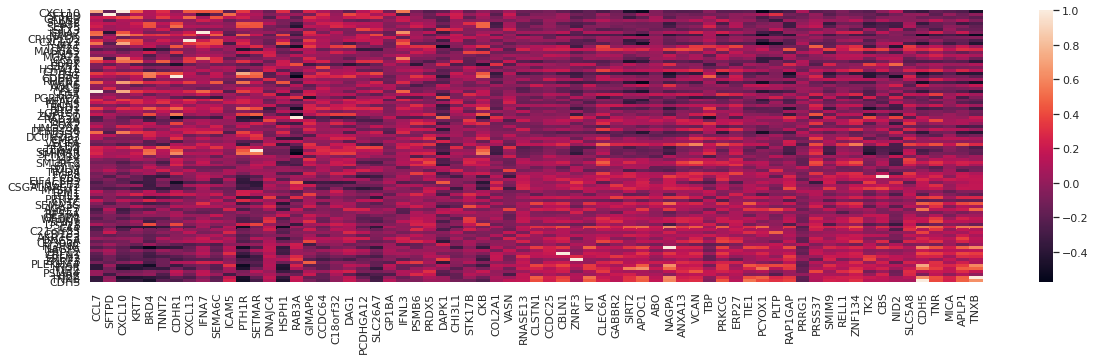

In [334]:
import seaborn as sns
fig = plt.figure(figsize=(20,5))

sns.heatmap(corr,xticklabels=True, yticklabels=True)

In [284]:
mask

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Text(545.8056722689075, 0.5, 'Effect Estimates')

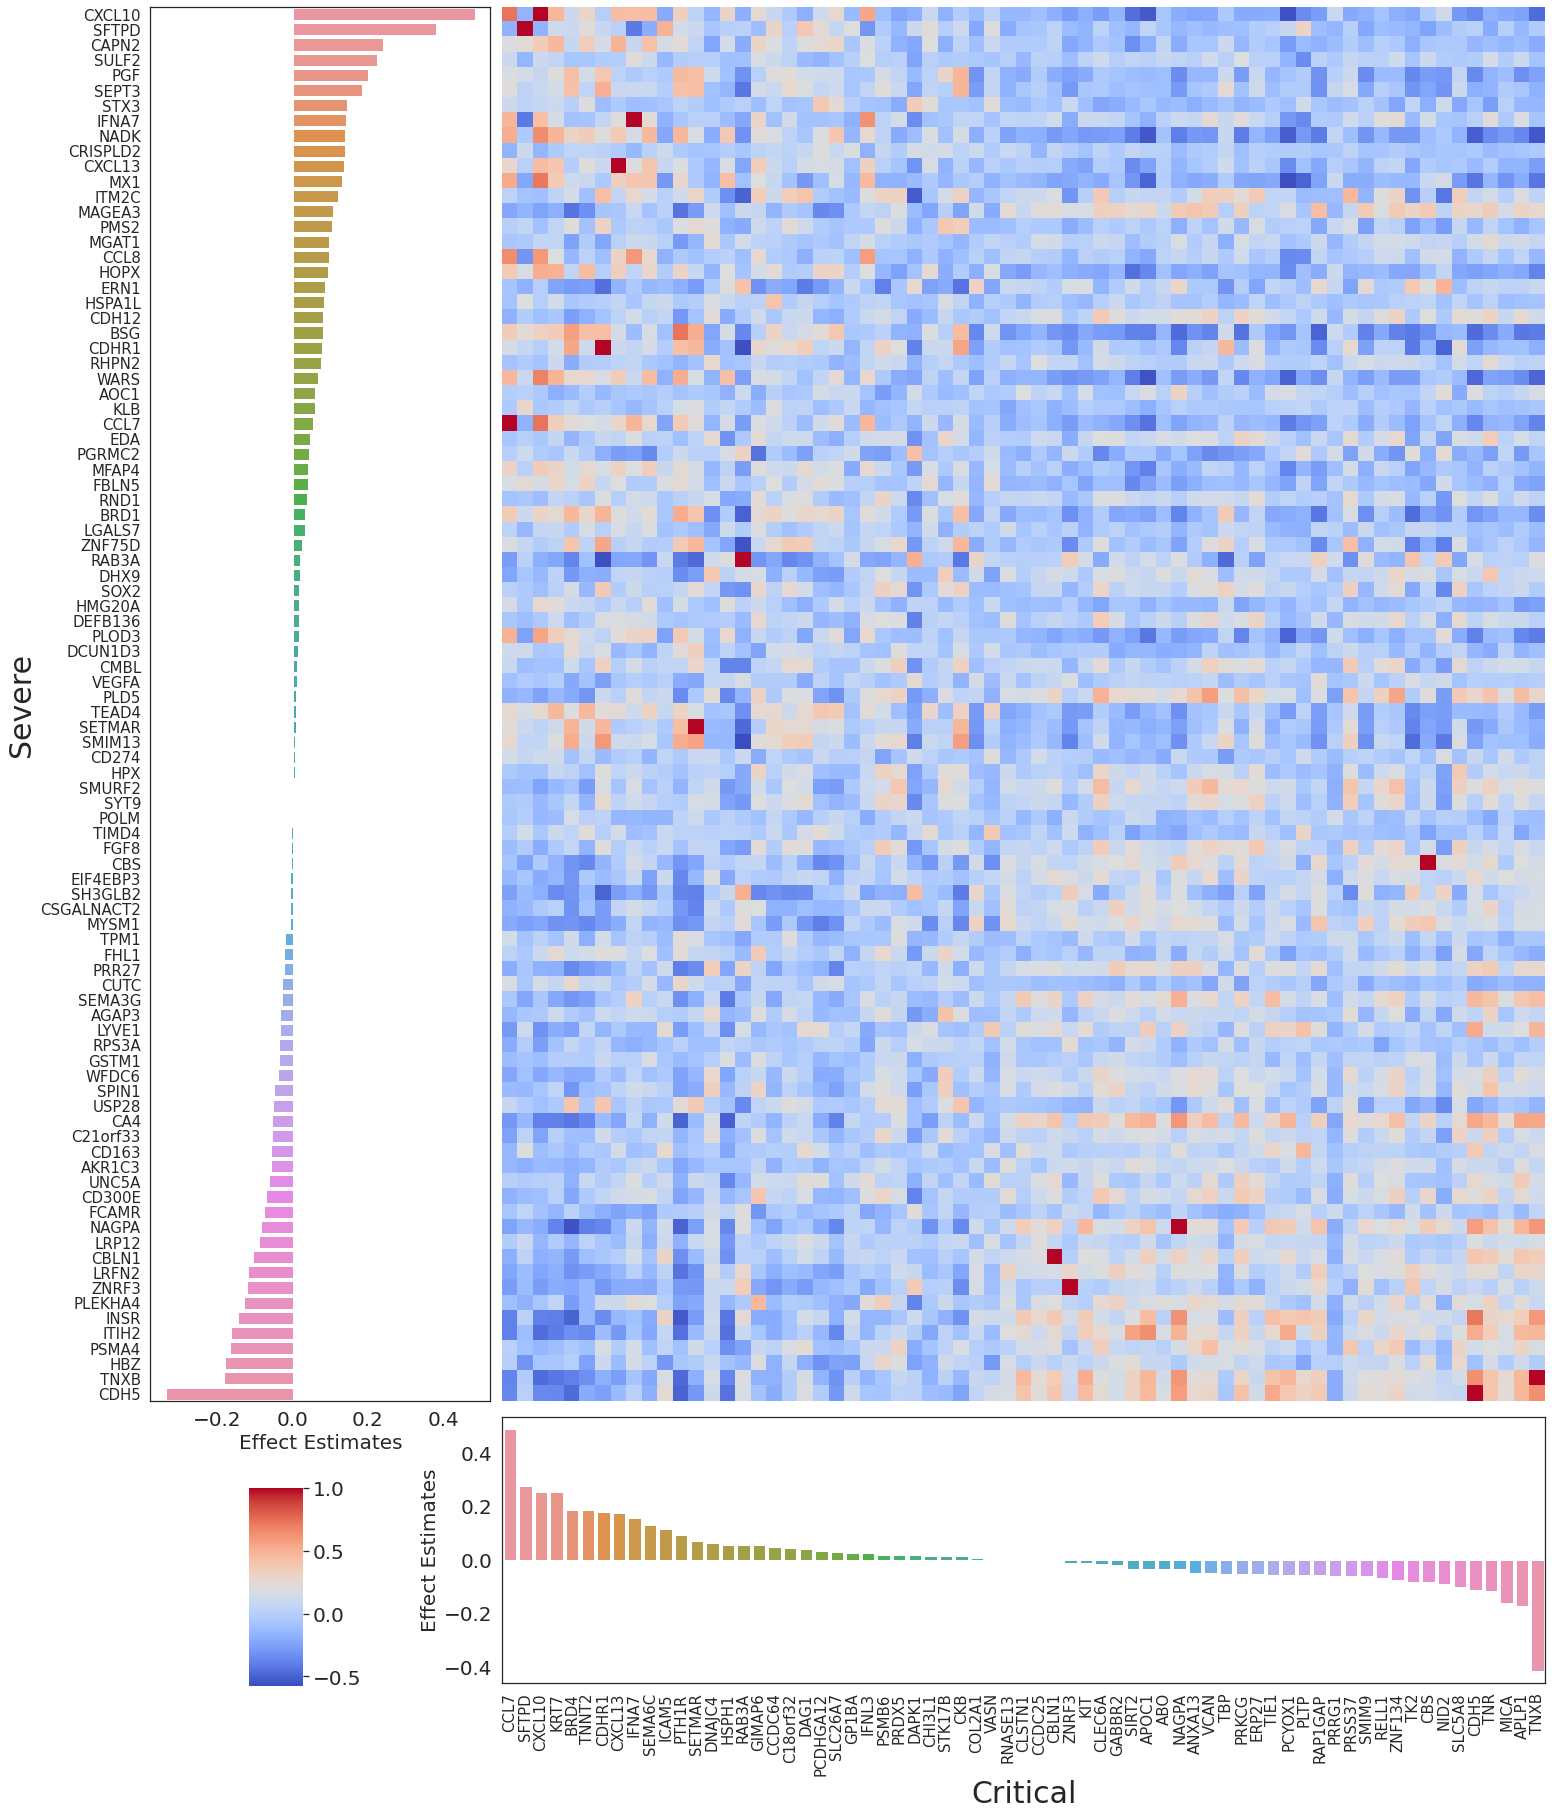

In [390]:
fig = plt.figure(figsize=(25,34.3))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=5, rowspan=15)  # severe coefficients
ax2 = plt.subplot2grid((20,20), (0,5), colspan=15, rowspan=15)  # heatmap
ax3 = plt.subplot2grid((20,20), (15,5), colspan=15, rowspan=3)  # critical coefficients

# severe Coefficients
sns.barplot(x=a3_prot_vals,y=a3_prot, ax=ax1)
_ = ax1.set_yticklabels(a3_prot, size=15)  # assign to _ to prevent from printing
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.set_ylabel("Severe", size=30)
ax1.set_xlabel("Effect Estimates", size=20)


# heatmap
cbar_ax = fig.add_axes([.18, .2, .03, .08]) # left, bottom, width, height
# sns.heatmap(arr, ax=ax, cbar_ax = cbar_ax, cbar=True)
sns.heatmap(corr, ax=ax2, cbar_ax=cbar_ax,
            annot=False, linecolor='b',
            cbar = True, xticklabels=False, yticklabels=False, cmap='coolwarm')
cbar = ax2.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# critical coefficients
sns.barplot(y=a2_prot_vals,x=a2_prot, ax=ax3)
_ = ax3.set_xticklabels(list(corr.columns),rotation=90, size=15)  # assign to _ to prevent from printing

ax3.tick_params(axis='y', which='major', labelsize=20)
ax3.set_xlabel("Critical", size=30)
ax3.set_ylabel("Effect Estimates", size=20)


# ax.tick_params(axis='both', which='minor', labelsize=8)